# MAT 381E Final Project


## Text Analysis on Sub-Reddits

Sena İrem Toka (090190361)

Beyza Kopuz (090200354)

### For this project, each team member processed one dataset by herself. Sena got the tifu dataset and Beyza got the aita dataset. We did operations on them seperately and we sat down to compare the processes we went through and incorparated the interesting and useful steps on to other one's dataset as well.

Here is the link for the datasets we used, we uploded them on MEGA. https://mega.nz/folder/8TsHyZ5S#5-Ze80G_68giEIziOqkOPQ

## TIFU Text Analysis

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk import ngrams
from gensim import corpora, models
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from collections import Counter

In [2]:
file_path = 'datasets/tifu_all_tokenized_and_filtered.json'

data = []

with open(file_path, 'r') as file:
    for line in file:
        try:
            json_object = json.loads(line)
            data.append(json_object)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

tifu_df = pd.DataFrame(data)

In [3]:
tifu_df

title_tokenized  \
0      [tifu, by, forgetting, to, pull, my, underwear...   
1                       [tifu, by, gender, stereotyping]   
2                          [tifu, by, drinking, a, beer]   
3       [tifu, by, telling, my, dad, that, i, love, him]   
4      [tifu, :, how, hard, can, you, fail, at, somet...   
...                                                  ...   
79944    [tifu, by, forgetting, my, quarter, for, lunch]   
79945  [tifu, by, trying, to, shave, my, pubes, for, ...   
79946  [tifu, by, breaking, a, $, 0, window, with, a,...   
79947  [tifu, by, slicing, open, my, finger, on, firs...   
79948         [tifu, by, not, listening, to, my, mother]   

                                               permalink  \
0      /r/tifu/comments/1ghd5r/tifu_by_forgetting_to_...   
1      /r/tifu/comments/1ggydk/tifu_by_genderstereoty...   
2       /r/tifu/comments/1ggvyk/tifu_by_drinking_a_beer/   
3      /r/tifu/comments/1ggcmx/tifu_by_telling_my_dad...   
4      /r/tifu/comments/1ggbs9/tifu_how_hard_can_you_...   
...                                                  ...   
79944  /r/tifu/comments/7h9wse/tifu_by_forgetting_my_...   
79945  /r/tifu/comments/7h9gcp/tifu_by_trying_to_shav...   
79946  /r/tifu/comments/7h8n8r/tifu_by_breaking_a_900...   
79947  /r/tifu/comments/7h6yxb/tifu_by_slicing_open_m...   
79948  /r/tifu/comments/7h6lxj/tifu_by_not_listening_...   

                                                   title  \
0      TIFU by forgetting to pull my underwear down b...   
1                            TIFU by gender-stereotyping   
2                                TIFU by drinking a beer   
3                TIFU by telling my Dad that I love him.   
4              TIFU: How hard can you fail at something?   
...                                                  ...   
79944            TIFU by forgetting my quarter for lunch   
79945  TIFU by trying to shave my pubes for the first...   
79946  TIFU by breaking a $900 window with a shopping...   
79947  TIFU by slicing open my finger on first valent...   
79948                 TIFU by not listening to my mother   

                                                     url  num_comments  \
0      https://www.reddit.com/r/tifu/comments/1ghd5r/...            13   
1      https://www.reddit.com/r/tifu/comments/1ggydk/...            23   
2      https://www.reddit.com/r/tifu/comments/1ggvyk/...            11   
3      https://www.reddit.com/r/tifu/comments/1ggcmx/...            12   
4      https://www.reddit.com/r/tifu/comments/1ggbs9/...             2   
...                                                  ...           ...   
79944  https://www.reddit.com/r/tifu/comments/7h9wse/...            18   
79945  https://www.reddit.com/r/tifu/comments/7h9gcp/...            64   
79946  https://www.reddit.com/r/tifu/comments/7h8n8r/...           110   
79947  https://www.reddit.com/r/tifu/comments/7h6yxb/...             5   
79948  https://www.reddit.com/r/tifu/comments/7h6lxj/...            11   

                                                    tldr   created_utc  \
0                                                   None  1.371426e+09   
1       confuse a 5th grade girl for a boy in front o...  1.371412e+09   
2                                                   None  1.371410e+09   
3        i found my estranged dad, thought i loved hi...  1.371391e+09   
4                                                   None  1.371390e+09   
...                                                  ...           ...   
79944   forgot my quarter for lunch at school for a w...  1.512311e+09   
79945   girlfriend prefers clean shaven groin. i try ...  1.512305e+09   
79946   today i broke a window that costs more then i...  1.512290e+09   
79947   i invited over new girlfriend for dinner to s...  1.512267e+09   
79948   in a rush i mixed my colours in the wash and ...  1.512262e+09   

                                 trimmed_title_tokenized      id  \
0      [forgetting, to, pull, my

#### dropping the tokenized and unneeded columns

In [4]:
tifu = tifu_df.drop(tifu_df.columns[[0,7,14,16,17]], axis=1)

In [5]:
tifu

permalink  \
0      /r/tifu/comments/1ghd5r/tifu_by_forgetting_to_...   
1      /r/tifu/comments/1ggydk/tifu_by_genderstereoty...   
2       /r/tifu/comments/1ggvyk/tifu_by_drinking_a_beer/   
3      /r/tifu/comments/1ggcmx/tifu_by_telling_my_dad...   
4      /r/tifu/comments/1ggbs9/tifu_how_hard_can_you_...   
...                                                  ...   
79944  /r/tifu/comments/7h9wse/tifu_by_forgetting_my_...   
79945  /r/tifu/comments/7h9gcp/tifu_by_trying_to_shav...   
79946  /r/tifu/comments/7h8n8r/tifu_by_breaking_a_900...   
79947  /r/tifu/comments/7h6yxb/tifu_by_slicing_open_m...   
79948  /r/tifu/comments/7h6lxj/tifu_by_not_listening_...   

                                                   title  \
0      TIFU by forgetting to pull my underwear down b...   
1                            TIFU by gender-stereotyping   
2                                TIFU by drinking a beer   
3                TIFU by telling my Dad that I love him.   
4              TIFU: How hard can you fail at something?   
...                                                  ...   
79944            TIFU by forgetting my quarter for lunch   
79945  TIFU by trying to shave my pubes for the first...   
79946  TIFU by breaking a $900 window with a shopping...   
79947  TIFU by slicing open my finger on first valent...   
79948                 TIFU by not listening to my mother   

                                                     url  num_comments  \
0      https://www.reddit.com/r/tifu/comments/1ghd5r/...            13   
1      https://www.reddit.com/r/tifu/comments/1ggydk/...            23   
2      https://www.reddit.com/r/tifu/comments/1ggvyk/...            11   
3      https://www.reddit.com/r/tifu/comments/1ggcmx/...            12   
4      https://www.reddit.com/r/tifu/comments/1ggbs9/...             2   
...                                                  ...           ...   
79944  https://www.reddit.com/r/tifu/comments/7h9wse/...            18   
79945  https://www.reddit.com/r/tifu/comments/7h9gcp/...            64   
79946  https://www.reddit.com/r/tifu/comments/7h8n8r/...           110   
79947  https://www.reddit.com/r/tifu/comments/7h6yxb/...             5   
79948  https://www.reddit.com/r/tifu/comments/7h6lxj/...            11   

                                                    tldr   created_utc  \
0                                                   None  1.371426e+09   
1       confuse a 5th grade girl for a boy in front o...  1.371412e+09   
2                                                   None  1.371410e+09   
3        i found my estranged dad, thought i loved hi...  1.371391e+09   
4                                                   None  1.371390e+09   
...                                                  ...           ...   
79944   forgot my quarter for lunch at school for a w...  1.512311e+09   
79945   girlfriend prefers clean shaven groin. i try ...  1.512305e+09   
79946   today i broke a window that costs more then i...  1.512290e+09   
79947   i invited over new girlfriend for dinner to s...  1.512267e+09   
79948   in a rush i mixed my colours in the wash and ...  1.512262e+09   

           id                                      selftext_html  score  \
0      1ghd5r  <!-- SC_OFF --><div class="md"><p>I was on Sky...     50   
1      1ggydk  <!-- SC_OFF --><div class="md"><p>This actuall...    115   
2      1ggvyk  <!-- SC_OFF --><div class="md"><p>I tend to le...     14   
3      1ggcmx  <!-- SC_OFF --><div class="md"><p>It was last ...     16   
4      1ggbs9  <!-- SC_OFF --><div class="md"><p>Flashback to...      0   
...       ...                                                ...    ...   
79944  7h9wse  <!-- SC_OFF --><div class="md"><p>This happene...    105   
79945  7h9gcp  <!-- SC_OFF --><div class="md"><p>My girlfrien...     96   
79946  7h8n8r  <!-- SC_OFF --><div class="md"><p>Today at wor...    726   
79947  7h6yxb  <!-- SC_OFF --><div class="md"><p>So as u can ...     26   
79

### fixing the created_utc column to datetime so we have the date and time properly

In [6]:
tifu['tokenized_titles'] = tifu['title'].apply(lambda x: x.split())

tifu['created_utc'] = pd.to_datetime(tifu['created_utc'], unit='s')
tifu

permalink  \
0      /r/tifu/comments/1ghd5r/tifu_by_forgetting_to_...   
1      /r/tifu/comments/1ggydk/tifu_by_genderstereoty...   
2       /r/tifu/comments/1ggvyk/tifu_by_drinking_a_beer/   
3      /r/tifu/comments/1ggcmx/tifu_by_telling_my_dad...   
4      /r/tifu/comments/1ggbs9/tifu_how_hard_can_you_...   
...                                                  ...   
79944  /r/tifu/comments/7h9wse/tifu_by_forgetting_my_...   
79945  /r/tifu/comments/7h9gcp/tifu_by_trying_to_shav...   
79946  /r/tifu/comments/7h8n8r/tifu_by_breaking_a_900...   
79947  /r/tifu/comments/7h6yxb/tifu_by_slicing_open_m...   
79948  /r/tifu/comments/7h6lxj/tifu_by_not_listening_...   

                                                   title  \
0      TIFU by forgetting to pull my underwear down b...   
1                            TIFU by gender-stereotyping   
2                                TIFU by drinking a beer   
3                TIFU by telling my Dad that I love him.   
4              TIFU: How hard can you fail at something?   
...                                                  ...   
79944            TIFU by forgetting my quarter for lunch   
79945  TIFU by trying to shave my pubes for the first...   
79946  TIFU by breaking a $900 window with a shopping...   
79947  TIFU by slicing open my finger on first valent...   
79948                 TIFU by not listening to my mother   

                                                     url  num_comments  \
0      https://www.reddit.com/r/tifu/comments/1ghd5r/...            13   
1      https://www.reddit.com/r/tifu/comments/1ggydk/...            23   
2      https://www.reddit.com/r/tifu/comments/1ggvyk/...            11   
3      https://www.reddit.com/r/tifu/comments/1ggcmx/...            12   
4      https://www.reddit.com/r/tifu/comments/1ggbs9/...             2   
...                                                  ...           ...   
79944  https://www.reddit.com/r/tifu/comments/7h9wse/...            18   
79945  https://www.reddit.com/r/tifu/comments/7h9gcp/...            64   
79946  https://www.reddit.com/r/tifu/comments/7h8n8r/...           110   
79947  https://www.reddit.com/r/tifu/comments/7h6yxb/...             5   
79948  https://www.reddit.com/r/tifu/comments/7h6lxj/...            11   

                                                    tldr         created_utc  \
0                                                   None 2013-06-16 23:42:59   
1       confuse a 5th grade girl for a boy in front o... 2013-06-16 19:51:49   
2                                                   None 2013-06-16 19:16:51   
3        i found my estranged dad, thought i loved hi... 2013-06-16 14:02:12   
4                                                   None 2013-06-16 13:42:52   
...                                                  ...                 ...   
79944   forgot my quarter for lunch at school for a w... 2017-12-03 14:30:09   
79945   girlfriend prefers clean shaven groin. i try ... 2017-12-03 12:42:55   
79946   today i broke a window that costs more then i... 2017-12-03 08:32:12   
79947   i invited over new girlfriend for dinner to s... 2017-12-03 02:02:40   
79948   in a rush i mixed my colours in the wash and ... 2017-12-03 00:54:50   

           id                                      selftext_html  score  \
0      1ghd5r  <!-- SC_OFF --><div class="md"><p>I was on Sky...     50   
1      1ggydk  <!-- SC_OFF --><div class="md"><p>This actuall...    115   
2      1ggvyk  <!-- SC_OFF --><div class="md"><p>I tend to le...     14   
3      1ggcmx  <!-- SC_OFF --><div class="md"><p>It was last ...     16   
4      1ggbs9  <!-- SC_OFF --><div class="md"><p>Flashback to...      0   
...       ...                                                ...    ...   
79944  7h9wse  <!-- SC_OFF --><div class="md"><p>This happene...    105   
79945  7h9gcp  <!-- SC_OFF --><div class="md"><p>My girlfrien...     96   
79946  7h8n8r  <!-- SC_OFF --><div class="md"><p>Today at wor...    726   
79947

#### For the tifu dataset, I tried to do the processing on the data step by step according to the 'questions we are going to be asking' part we wrote in the project proposal.

#### The initial operations as related to the 'title' columns of the posts, therefore I started by tokenizing and removing the stopwords in the titles then I created a word cloud to visualize the most used words, but initially the most used word was tifu which is the name of the subreddit. Therefore I excluded it from the filtered words and created the wordcloud.

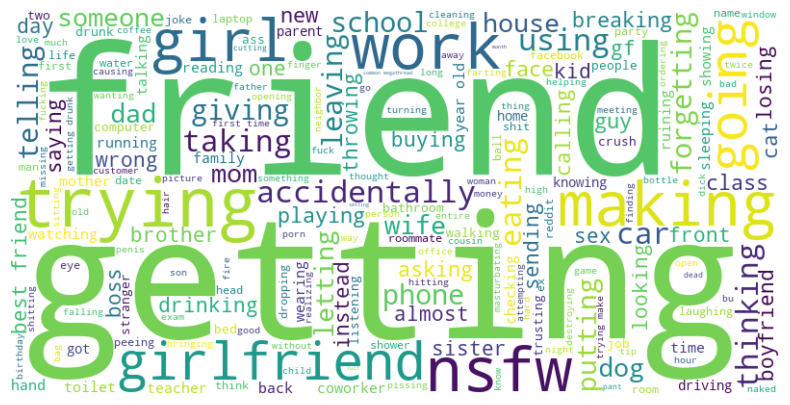

In [7]:
all_titles = ' '.join(tifu['title'].astype(str))

words = word_tokenize(all_titles)

stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() != 'tifu']

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Then by using the freqdist function in nltk, I wanted to see the number of times that the 20 most popular words were used and I visualized them.

trying: 4451
getting: 4076
nsfw: 2832
friend: 2580
girl: 2213
going: 2203
making: 2181
work: 2003
telling: 1816
taking: 1762
accidentally: 1738
girlfriend: 1663
car: 1662
eating: 1483
using: 1461
wrong: 1407
phone: 1308
letting: 1298
giving: 1179
school: 1148


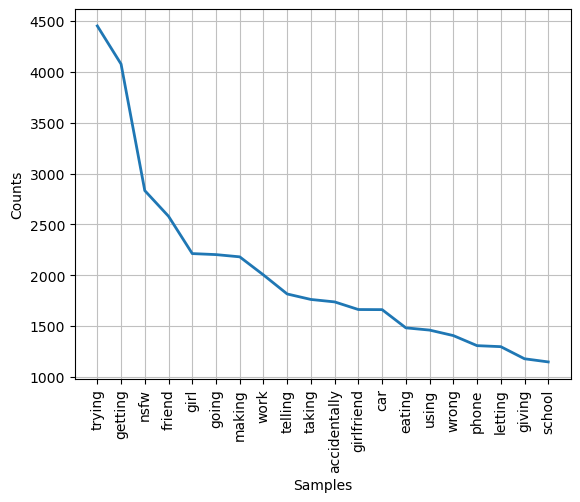

In [8]:
freq_dist = FreqDist(filtered_words)
top_words = freq_dist.most_common(20)  

for word, count in top_words:
    print(f'{word}: {count}')

freq_dist.plot(20, cumulative=False)
plt.show()

### I wanted to see the most commonly used phrases, for that I used the ngrams from the nltk library. I got the most commonly used 10 bi-grams and tri-grams and visualized the frequency distribution of them.

Top Bi-grams:
('year', 'old'): 377
('best', 'friend'): 365
('getting', 'drunk'): 268
('trying', 'get'): 264
('trying', 'make'): 217
('first', 'time'): 196
('common', 'megathread'): 184
('falling', 'asleep'): 172
('paying', 'attention'): 157
('trying', 'help'): 148

Top Tri-grams:
('common', 'megathread', 'nsfw'): 92
('almost', 'burning', 'house'): 40
('trying', 'impress', 'girl'): 28
('letting', 'year', 'old'): 26
('year', 'old', 'daughter'): 26
('locking', 'keys', 'car'): 23
('telling', 'best', 'friend'): 23
('trying', 'get', 'rid'): 21
('setting', 'fire', 'alarm'): 20
('year', 'old', 'girl'): 20


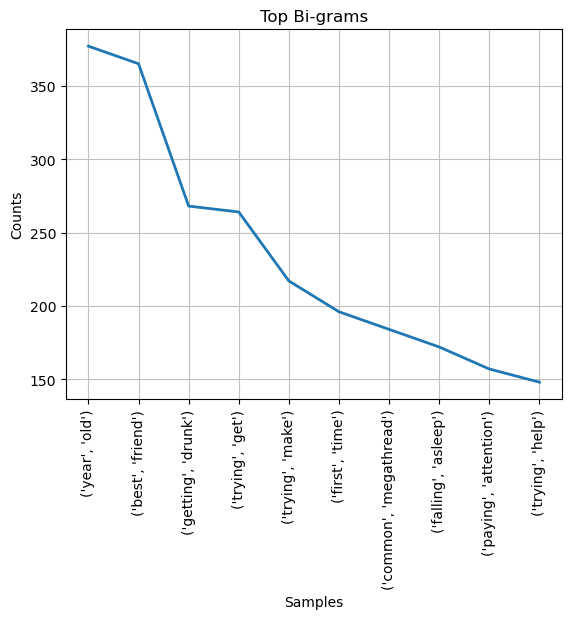

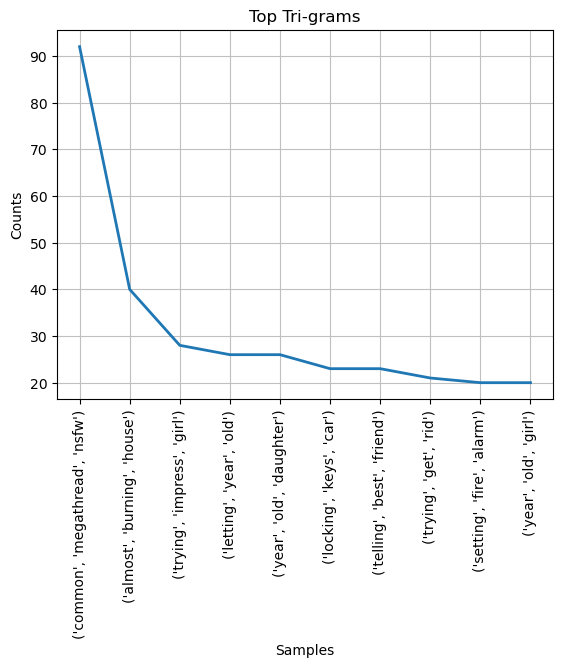

In [9]:
bi_grams = list(ngrams(filtered_words, 2))
tri_grams = list(ngrams(filtered_words, 3))

bi_gram_freq = FreqDist(bi_grams)
tri_gram_freq = FreqDist(tri_grams)

top_bi_grams = bi_gram_freq.most_common(10)  
top_tri_grams = tri_gram_freq.most_common(10)  

print("Top Bi-grams:")
for phrase, count in top_bi_grams:
    print(f'{phrase}: {count}')

print("\nTop Tri-grams:")
for phrase, count in top_tri_grams:
    print(f'{phrase}: {count}')

bi_gram_freq.plot(10, cumulative=False, title="Top Bi-grams")
tri_gram_freq.plot(10, cumulative=False, title="Top Tri-grams")
plt.show()

### I tried to create 5 topics from the title's of tifu entries and see the most used words and their weighted distributions in the topics using the LDA (Latent Dirichlet allocation) model. 

In [10]:
documents = tifu['title'].astype(str).tolist()

stop_words = set(stopwords.words('english'))
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
filtered_documents = [[word for word in doc if word.isalpha() and word not in stop_words and word.lower() != 'tifu'] for doc in tokenized_documents]

dictionary = corpora.Dictionary(filtered_documents)
corpus = [dictionary.doc2bow(doc) for doc in filtered_documents]

num_topics = 5  
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)  
for topic in topics:
    print(topic)

(0, '0.053*"trying" + 0.019*"wrong" + 0.018*"phone" + 0.017*"forgetting" + 0.012*"drinking"')
(1, '0.030*"nsfw" + 0.029*"almost" + 0.014*"girlfriend" + 0.013*"using" + 0.012*"burning"')
(2, '0.022*"making" + 0.017*"friend" + 0.016*"accidentally" + 0.013*"old" + 0.012*"fire"')
(3, '0.028*"taking" + 0.024*"trying" + 0.021*"eating" + 0.016*"thinking" + 0.014*"dog"')
(4, '0.069*"getting" + 0.018*"breaking" + 0.015*"car" + 0.015*"playing" + 0.012*"nsfw"')


### I wanted to see the probability of each entry belonging in of these topics so I used the corpus library's functions and added the probabilities for each entry to the dataset

In [11]:
topic_distribution = [lda_model.get_document_topics(doc) for doc in corpus]
topics = [[prob for _, prob in topic] for topic in topic_distribution]
topics_df = pd.DataFrame(topics, columns=[f'Topic_{i}' for i in range(num_topics)])
df = pd.concat([tifu, topics_df], axis=1)
df

permalink  \
0      /r/tifu/comments/1ghd5r/tifu_by_forgetting_to_...   
1      /r/tifu/comments/1ggydk/tifu_by_genderstereoty...   
2       /r/tifu/comments/1ggvyk/tifu_by_drinking_a_beer/   
3      /r/tifu/comments/1ggcmx/tifu_by_telling_my_dad...   
4      /r/tifu/comments/1ggbs9/tifu_how_hard_can_you_...   
...                                                  ...   
79944  /r/tifu/comments/7h9wse/tifu_by_forgetting_my_...   
79945  /r/tifu/comments/7h9gcp/tifu_by_trying_to_shav...   
79946  /r/tifu/comments/7h8n8r/tifu_by_breaking_a_900...   
79947  /r/tifu/comments/7h6yxb/tifu_by_slicing_open_m...   
79948  /r/tifu/comments/7h6lxj/tifu_by_not_listening_...   

                                                   title  \
0      TIFU by forgetting to pull my underwear down b...   
1                            TIFU by gender-stereotyping   
2                                TIFU by drinking a beer   
3                TIFU by telling my Dad that I love him.   
4              TIFU: How hard can you fail at something?   
...                                                  ...   
79944            TIFU by forgetting my quarter for lunch   
79945  TIFU by trying to shave my pubes for the first...   
79946  TIFU by breaking a $900 window with a shopping...   
79947  TIFU by slicing open my finger on first valent...   
79948                 TIFU by not listening to my mother   

                                                     url  num_comments  \
0      https://www.reddit.com/r/tifu/comments/1ghd5r/...            13   
1      https://www.reddit.com/r/tifu/comments/1ggydk/...            23   
2      https://www.reddit.com/r/tifu/comments/1ggvyk/...            11   
3      https://www.reddit.com/r/tifu/comments/1ggcmx/...            12   
4      https://www.reddit.com/r/tifu/comments/1ggbs9/...             2   
...                                                  ...           ...   
79944  https://www.reddit.com/r/tifu/comments/7h9wse/...            18   
79945  https://www.reddit.com/r/tifu/comments/7h9gcp/...            64   
79946  https://www.reddit.com/r/tifu/comments/7h8n8r/...           110   
79947  https://www.reddit.com/r/tifu/comments/7h6yxb/...             5   
79948  https://www.reddit.com/r/tifu/comments/7h6lxj/...            11   

                                                    tldr         created_utc  \
0                                                   None 2013-06-16 23:42:59   
1       confuse a 5th grade girl for a boy in front o... 2013-06-16 19:51:49   
2                                                   None 2013-06-16 19:16:51   
3        i found my estranged dad, thought i loved hi... 2013-06-16 14:02:12   
4                                                   None 2013-06-16 13:42:52   
...                                                  ...                 ...   
79944   forgot my quarter for lunch at school for a w... 2017-12-03 14:30:09   
79945   girlfriend prefers clean shaven groin. i try ... 2017-12-03 12:42:55   
79946   today i broke a window that costs more then i... 2017-12-03 08:32:12   
79947   i invited over new girlfriend for dinner to s... 2017-12-03 02:02:40   
79948   in a rush i mixed my colours in the wash and ... 2017-12-03 00:54:50   

           id                                      selftext_html  score  \
0      1ghd5r  <!-- SC_OFF --><div class="md"><p>I was on Sky...     50   
1      1ggydk  <!-- SC_OFF --><div class="md"><p>This actuall...    115   
2      1ggvyk  <!-- SC_OFF --><div class="md"><p>I tend to le...     14   
3      1ggcmx  <!-- SC_OFF --><div class="md"><p>It was last ...     16   
4      1ggbs9  <!-- SC_OFF --><div class="md"><p>Flashback to...      0   
...       ...                                                ...    ...   
79944  7h9wse  <!-- SC_OFF --><div class="md"><p>This happene...    105   
79945  7h9gcp  <!-- SC_OFF --><div class="md"><p>My girlfrien...     96   
79946  7h8n8r  <!-- SC_OFF --><div class="md"><p>Today at wor...    726   
79947

### I created a correlation matrix to see the engagements each topic got 

In [12]:
correlation_matrix = df[['num_comments', 'ups'] + [f'Topic_{i}' for i in range(num_topics)]].corr()
correlation_matrix

num_comments       ups   Topic_0   Topic_1   Topic_2   Topic_3  \
num_comments      1.000000  0.782695 -0.021804  0.021969  0.005675 -0.009015   
ups               0.782695  1.000000 -0.011235  0.017576  0.001816 -0.007797   
Topic_0          -0.021804 -0.011235  1.000000 -0.250111 -0.274012 -0.235055   
Topic_1           0.021969  0.017576 -0.250111  1.000000 -0.269708 -0.236223   
Topic_2           0.005675  0.001816 -0.274012 -0.269708  1.000000 -0.248302   
Topic_3          -0.009015 -0.007797 -0.235055 -0.236223 -0.248302  1.000000   
Topic_4           0.003108 -0.000438 -0.254812 -0.232996 -0.258677 -0.238116   

               Topic_4  
num_comments  0.003108  
ups          -0.000438  
Topic_0      -0.254812  
Topic_1      -0.232996  
Topic_2      -0.258677  
Topic_3      -0.238116  
Topic_4       1.000000

#### Seeing this correlation matrix made my wonder about the relationship between the most used words and the engagement they usually get. Hence, I vectorized the titles and created tf-idf matrix which gets the 'importance' for each word. I selected some words from the most commonly used word plot that I created before.

In [13]:
documents = tifu['title'].astype(str).tolist()
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_with_tfidf = pd.concat([tifu, tfidf_df], axis=1)
selected_features = ['friend', 'girl', 'accidentally']  

correlation_matrix_words = df_with_tfidf[['num_comments', 'upvote_ratio'] + selected_features].corr()
correlation_matrix_words

num_comments  upvote_ratio    friend      girl  accidentally
num_comments      1.000000      0.129377 -0.012585  0.014014      0.007696
upvote_ratio      0.129377      1.000000 -0.038056 -0.040286      0.007640
friend           -0.012585     -0.038056  1.000000 -0.007757      0.003751
girl              0.014014     -0.040286 -0.007757  1.000000      0.006832
accidentally      0.007696      0.007640  0.003751  0.006832      1.000000

I wanted to see the distribution of the posts created by the time of the day. I visualized it as below.

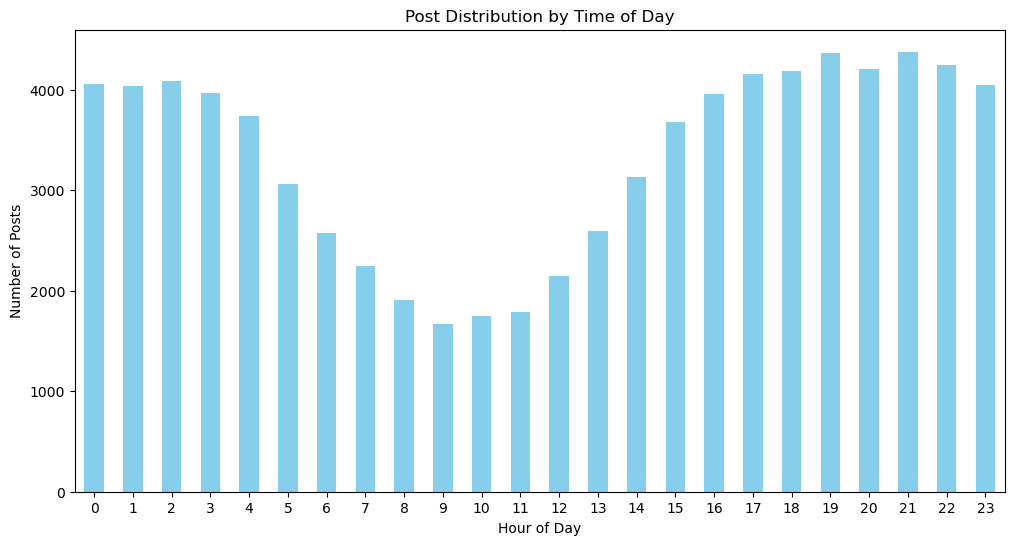

In [14]:
tifu['hour'] = tifu['created_utc'].dt.hour

post_distribution = tifu['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
post_distribution.plot(kind='bar', color='skyblue')
plt.title('Post Distribution by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

### I created this plot to see if there is any correlation with the engagement a post gets and the time of day it was posted.

<Figure size 1200x600 with 0 Axes>

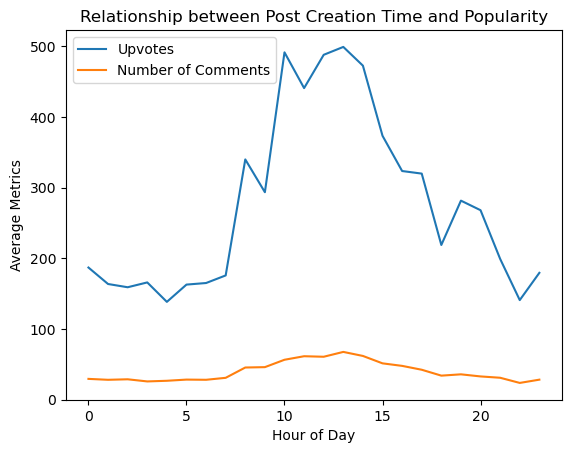

In [15]:
popularity_relationship = tifu.groupby('hour')[['ups', 'num_comments']].mean()
plt.figure(figsize=(12, 6))
popularity_relationship.plot()
plt.title('Relationship between Post Creation Time and Popularity')
plt.xlabel('Hour of Day')
plt.ylabel('Average Metrics')
plt.legend(['Upvotes', 'Number of Comments'])
plt.show()

### I created a function that calculates the correlation between the given column's text length and the engagements that it got. We can see the number of comments and score is highly correlated.

In [16]:
def calculate_correlation(df, text_column):

    df['text_length'] = df[text_column].apply(lambda x: len(str(x).split()))
    engagement_metrics = df[['upvote_ratio', 'score', 'num_comments']]
    df_combined = pd.concat([df['text_length'], engagement_metrics], axis=1)
    correlation_matrix = df_combined.corr()

    return correlation_matrix

In [17]:
correlation_matrix_title = calculate_correlation(tifu, 'title')
correlation_matrix_title

text_length  upvote_ratio     score  num_comments
text_length      1.000000      0.018987  0.044270      0.057491
upvote_ratio     0.018987      1.000000  0.095078      0.129377
score            0.044270      0.095078  1.000000      0.782695
num_comments     0.057491      0.129377  0.782695      1.000000

In [18]:
correlation_matrix_posttext = calculate_correlation(tifu, 'selftext')
correlation_matrix_posttext

text_length  upvote_ratio     score  num_comments
text_length      1.000000      0.128359  0.075371      0.119224
upvote_ratio     0.128359      1.000000  0.095078      0.129377
score            0.075371      0.095078  1.000000      0.782695
num_comments     0.119224      0.129377  0.782695      1.000000

### I visualized the post and title lenghts' vs the engagement metrics. There seem to be a lot of short titles and posts that get no engagement at all.

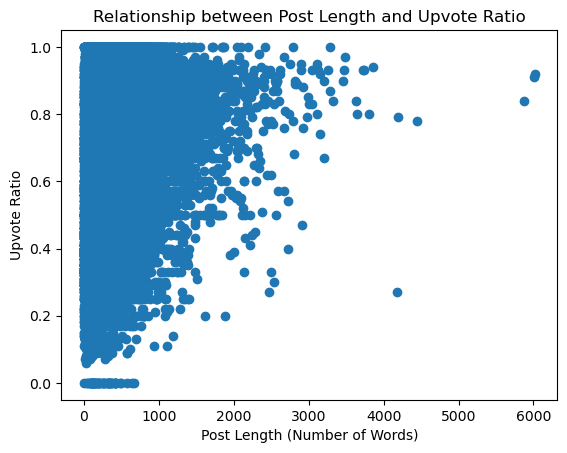

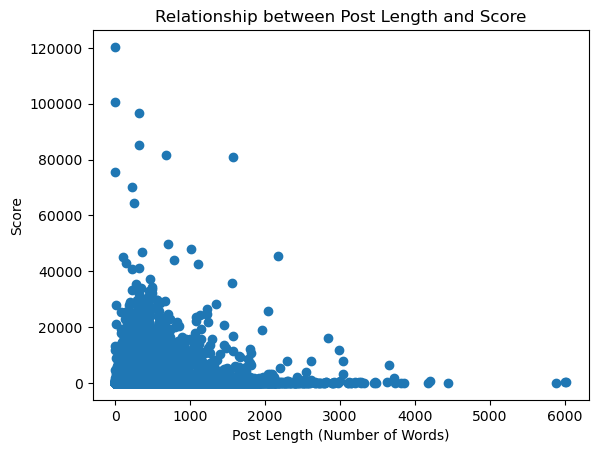

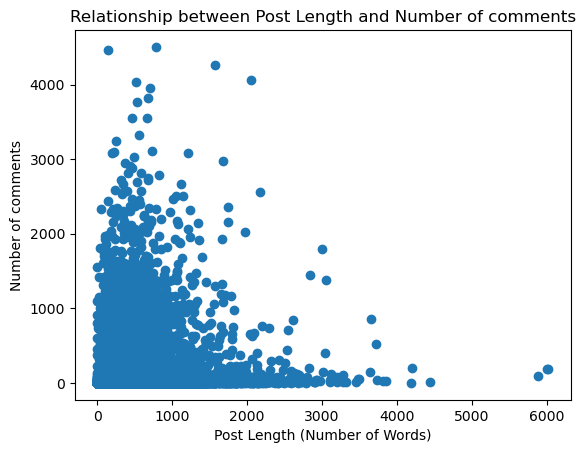

In [19]:
tifu['post_length'] = tifu['selftext'].apply(lambda x: len(str(x).split()))
engagement_metrics = tifu[['upvote_ratio', 'score', 'num_comments']]
df = pd.concat([tifu['post_length'], engagement_metrics], axis=1)
plt.scatter(df['post_length'], df['upvote_ratio'])
plt.title('Relationship between Post Length and Upvote Ratio')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Upvote Ratio')
plt.show()

plt.scatter(df['post_length'], df['score'])
plt.title('Relationship between Post Length and Score')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Score')
plt.show()

plt.scatter(df['post_length'], df['num_comments'])
plt.title('Relationship between Post Length and Number of comments')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of comments')
plt.show()

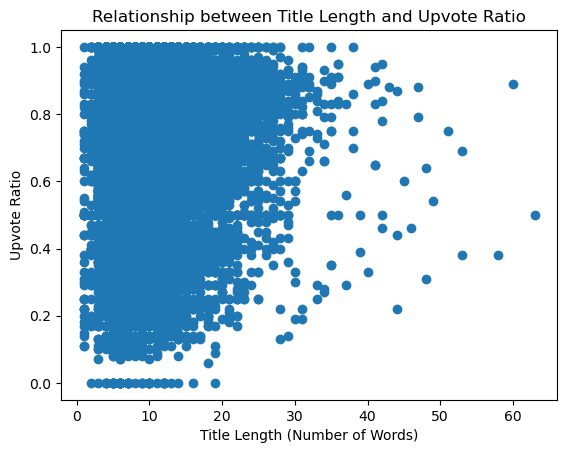

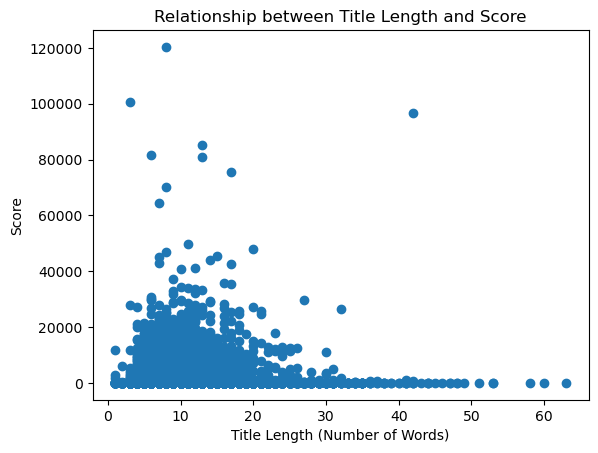

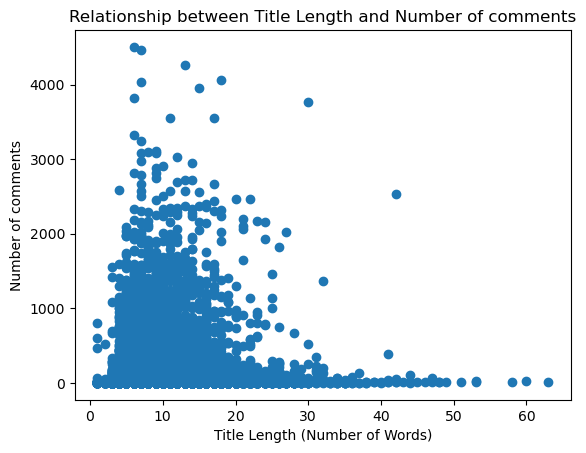

In [20]:
tifu['title_length'] = tifu['title'].apply(lambda x: len(str(x).split()))
engagement_metrics = tifu[['upvote_ratio', 'score', 'num_comments']]
df = pd.concat([tifu['title_length'], engagement_metrics], axis=1)
plt.scatter(df['title_length'], df['upvote_ratio'])
plt.title('Relationship between Title Length and Upvote Ratio')
plt.xlabel('Title Length (Number of Words)')
plt.ylabel('Upvote Ratio')
plt.show()

plt.scatter(df['title_length'], df['score'])
plt.title('Relationship between Title Length and Score')
plt.xlabel('Title Length (Number of Words)')
plt.ylabel('Score')
plt.show()

plt.scatter(df['title_length'], df['num_comments'])
plt.title('Relationship between Title Length and Number of comments')
plt.xlabel('Title Length (Number of Words)')
plt.ylabel('Number of comments')
plt.show()

### I also created a regression line for this metrics and the post and title lengths to see if there is a relationship and the number of comments and score regression lines seem to be slightly accurate.

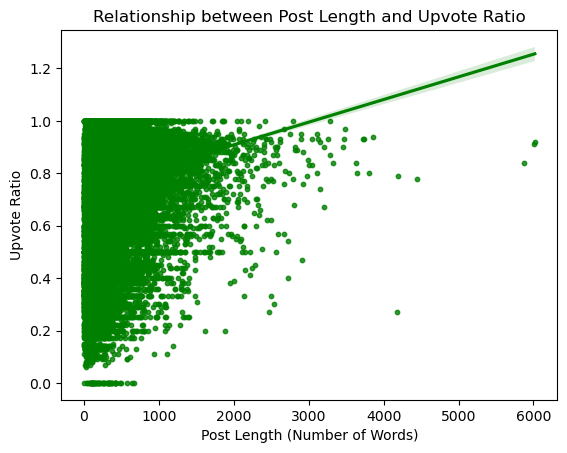

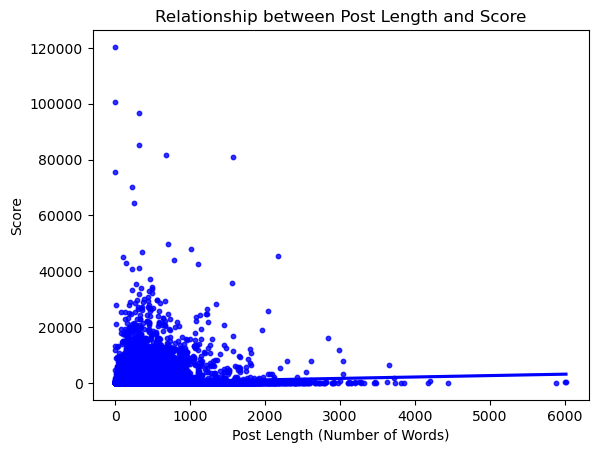

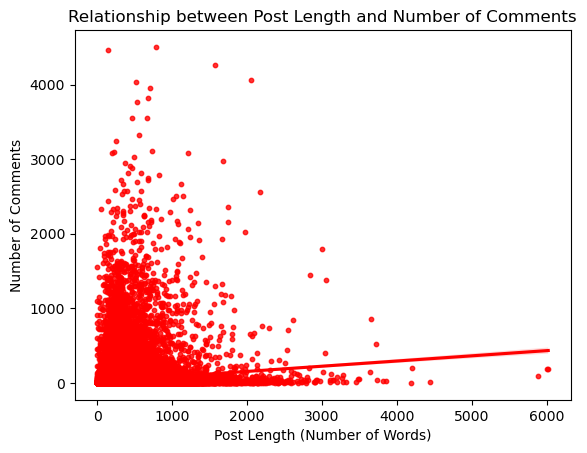

In [21]:
sns.regplot(x='post_length', y='upvote_ratio', data=tifu, scatter_kws={'s': 10}, color='green')
plt.title('Relationship between Post Length and Upvote Ratio')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Upvote Ratio')
plt.show()

sns.regplot(x='post_length', y='score', data=tifu, scatter_kws={'s': 10}, color='blue')
plt.title('Relationship between Post Length and Score')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Score')
plt.show()

sns.regplot(x='post_length', y='num_comments', data=tifu, scatter_kws={'s': 10}, color='red')
plt.title('Relationship between Post Length and Number of Comments')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Comments')
plt.show()

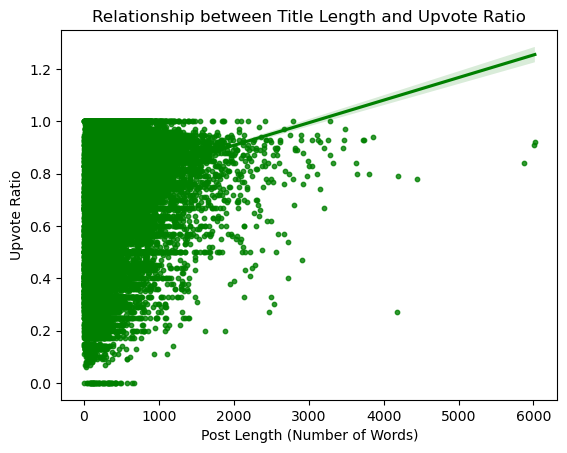

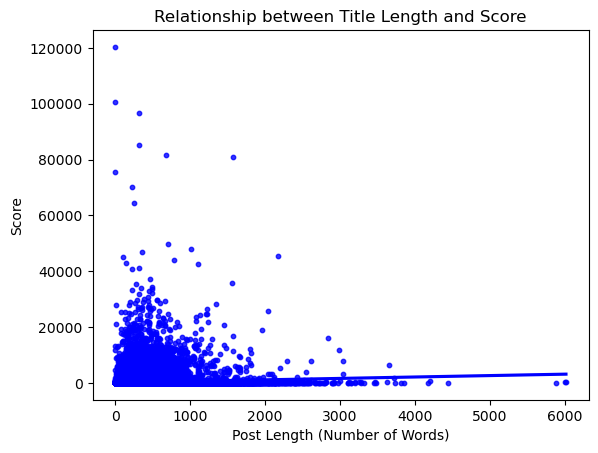

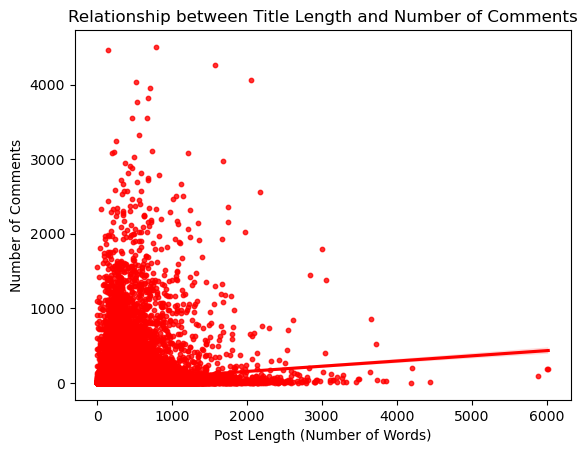

In [22]:
sns.regplot(x='post_length', y='upvote_ratio', data=tifu, scatter_kws={'s': 10}, color='green')
plt.title('Relationship between Title Length and Upvote Ratio')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Upvote Ratio')
plt.show()

sns.regplot(x='post_length', y='score', data=tifu, scatter_kws={'s': 10}, color='blue')
plt.title('Relationship between Title Length and Score')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Score')
plt.show()

sns.regplot(x='post_length', y='num_comments', data=tifu, scatter_kws={'s': 10}, color='red')
plt.title('Relationship between Title Length and Number of Comments')
plt.xlabel('Post Length (Number of Words)')
plt.ylabel('Number of Comments')
plt.show()

### As the next step I decided to do sentiment analysis on the titles as positive, neutral and negative posts. For this I used the Sentiment Intensity Analyzer from the nltk library to get polarity scores and classify them.

In [23]:
sia = SentimentIntensityAnalyzer()
tifu['sentiment'] = tifu['title'].apply(lambda x: sia.polarity_scores(x)['compound'])

tifu['sentiment_label'] = tifu['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
tifu[['title', 'sentiment', 'sentiment_label']]

title  sentiment  \
0      TIFU by forgetting to pull my underwear down b...     0.0000   
1                            TIFU by gender-stereotyping     0.0000   
2                                TIFU by drinking a beer     0.0000   
3                TIFU by telling my Dad that I love him.     0.6369   
4              TIFU: How hard can you fail at something?    -0.5994   
...                                                  ...        ...   
79944            TIFU by forgetting my quarter for lunch     0.0000   
79945  TIFU by trying to shave my pubes for the first...     0.0000   
79946  TIFU by breaking a $900 window with a shopping...     0.0000   
79947  TIFU by slicing open my finger on first valent...     0.0000   
79948                 TIFU by not listening to my mother     0.0000   

      sentiment_label  
0             neutral  
1             neutral  
2             neutral  
3            positive  
4            negative  
...               ...  
79944         neutral  
79945         neutral  
79946         neutral  
79947         neutral  
79948         neutral  

[79949 rows x 3 columns]

### I plotted the distribution of each sentiment category.

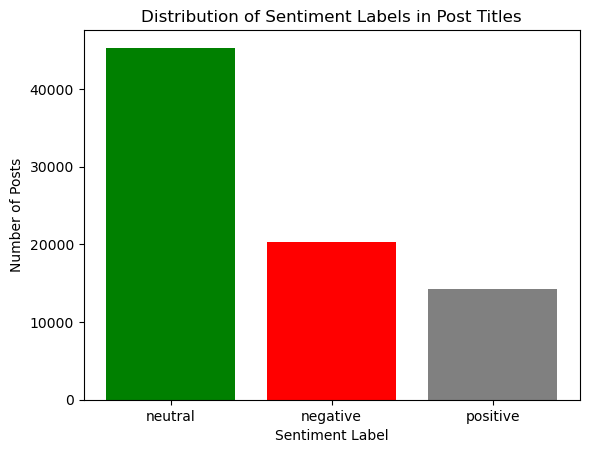

In [24]:
sentiment_counts = tifu['sentiment_label'].value_counts()
colors = ['green', 'red', 'gray']

plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.title('Distribution of Sentiment Labels in Post Titles')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.show()

### I got the most commonly used words in each sentiment category and how many times they were used.

In [25]:
stop_words = set(stopwords.words('english'))

positive_titles = ' '.join(tifu[tifu['sentiment_label'] == 'positive']['title'])
positive_tokens = [word.lower() for word in word_tokenize(positive_titles) if word.isalpha() and word not in stop_words  and word.lower() != 'tifu']

negative_titles = ' '.join(tifu[tifu['sentiment_label'] == 'negative']['title'])
negative_tokens = [word.lower() for word in word_tokenize(negative_titles) if word.isalpha() and word not in stop_words  and word.lower() != 'tifu']

neutral_titles = ' '.join(tifu[tifu['sentiment_label'] == 'neutral']['title'])
neutral_tokens = [word.lower() for word in word_tokenize(neutral_titles) if word.isalpha() and word not in stop_words  and word.lower() != 'tifu']

positive_freq_dist = FreqDist(positive_tokens)
negative_freq_dist = FreqDist(negative_tokens)
neutral_freq_dist = FreqDist(neutral_tokens)

print("Most common words in positive posts:")
print(positive_freq_dist.most_common(10))

print("\nMost common words in negative posts:")
print(negative_freq_dist.most_common(10))

print("\nMost common words in neutral posts:")
print(neutral_freq_dist.most_common(10))

Most common words in positive posts:
[('friend', 1896), ('i', 1577), ('trying', 1447), ('by', 984), ('giving', 958), ('friends', 827), ('playing', 783), ('girl', 745), ('telling', 652), ('best', 566)]

Most common words in negative posts:
[('i', 1886), ('getting', 1790), ('accidentally', 1551), ('wrong', 1340), ('by', 1291), ('trying', 768), ('making', 730), ('losing', 650), ('drunk', 608), ('nsfw', 579)]

Most common words in neutral posts:
[('by', 2930), ('i', 2666), ('trying', 2236), ('nsfw', 1809), ('getting', 1808), ('going', 1552), ('work', 1249), ('eating', 1179), ('taking', 1129), ('using', 1039)]


### I created a function to visualize the distribution of the most used words for each sentiment 

In [26]:
def plot_most_common_words(freq_dist, title):
    words, counts = zip(*freq_dist.most_common(10))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Most Common Words in {title} Posts')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()


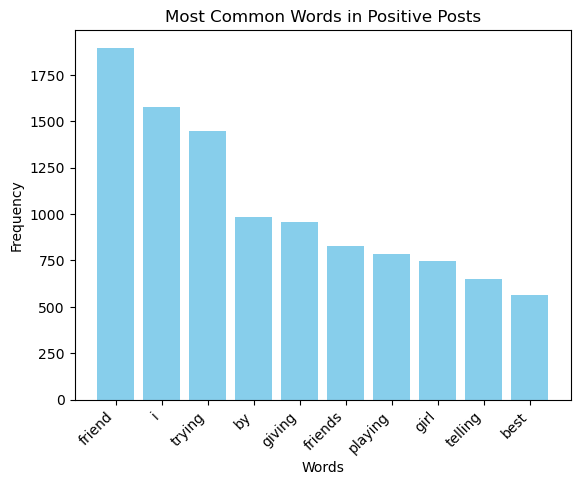

In [27]:
plot_most_common_words(positive_freq_dist, 'Positive')


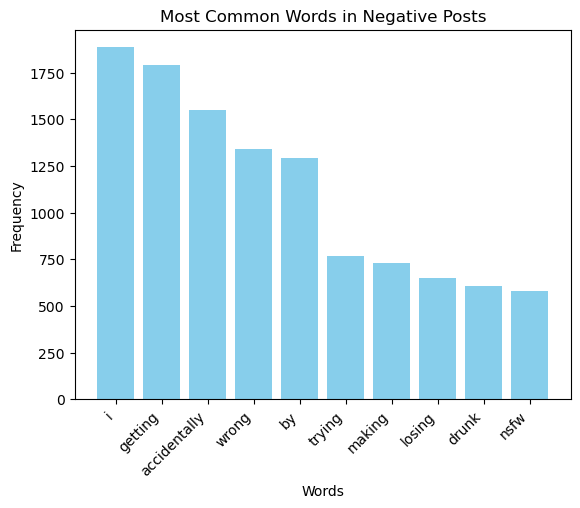

In [28]:
plot_most_common_words(negative_freq_dist, 'Negative')


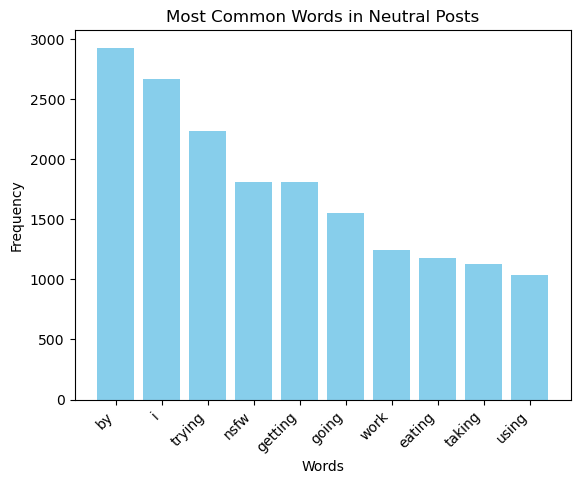

In [29]:
plot_most_common_words(neutral_freq_dist, 'Neutral')

### I got the average engagements from each sentiment category. We can see the negative posts got more comments and score. 

In [30]:
sentiment_metrics = tifu.groupby('sentiment_label')[['num_comments', 'score', 'upvote_ratio']].mean()

sentiment_metrics

num_comments       score  upvote_ratio
sentiment_label                                        
negative            42.595178  315.897860      0.762504
neutral             35.140496  239.060704      0.764742
positive            36.580316  234.415280      0.759548

### After plotting the most commonly used words I decided to also get the most commoon phrases for each sentiment category.

In [31]:
def get_most_common_phrases(data, sentiment, ngram_range=(2, 2), top_n=10, excluded_word='tifu'):
    sentiment_data = data[data['sentiment_label'] == sentiment]    
    documents = sentiment_data['title'].astype(str).tolist()

    stop_words = set(stopwords.words('english'))
    tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
    filtered_documents = [[word for word in doc if word.isalpha() and word not in stop_words and word != excluded_word] for doc in tokenized_documents]
    n_grams = [ngrams(doc, ngram_range[0]) for doc in filtered_documents]
    flattened_n_grams = [phrase for ngram_list in n_grams for phrase in ngram_list]
    frequency_distribution = FreqDist(flattened_n_grams)
    top_phrases = frequency_distribution.most_common(top_n)
    return top_phrases

In [32]:
neutral_top_phrases = get_most_common_phrases(tifu, 'neutral')
positive_top_phrases = get_most_common_phrases(tifu, 'positive')
negative_top_phrases = get_most_common_phrases(tifu, 'negative')


print("Positive Most Common Phrases:", positive_top_phrases)
print("Negative Most Common Phrases:", negative_top_phrases)
print("Neutral Most Common Phrases:", neutral_top_phrases)

Positive Most Common Phrases: [(('best', 'friend'), 357), (('trying', 'help'), 126), (('trying', 'save'), 102), (('making', 'fun'), 86), (('best', 'friends'), 82), (('year', 'old'), 79), (('making', 'joke'), 78), (('telling', 'friend'), 78), (('trying', 'make'), 78), (('girl', 'like'), 76)]
Negative Most Common Phrases: [(('getting', 'drunk'), 232), (('falling', 'asleep'), 156), (('almost', 'killing'), 112), (('year', 'old'), 102), (('wrong', 'person'), 99), (('almost', 'getting'), 84), (('getting', 'fired'), 75), (('shitting', 'pants'), 69), (('wrong', 'time'), 64), (('accidentally', 'making'), 62)]
Neutral Most Common Phrases: [(('year', 'old'), 196), (('common', 'megathread'), 184), (('trying', 'get'), 174), (('paying', 'attention'), 135), (('first', 'time'), 128), (('trying', 'make'), 116), (('getting', 'caught'), 104), (('getting', 'high'), 103), (('megathread', 'nsfw'), 92), (('brushing', 'teeth'), 81)]


### I visualized the most common phrases' distribution for each sentiment category.

In [33]:
def plot_most_common_phrases(data, sentiment, ngram_range=(2, 2), top_n=10, excluded_word=None):
    top_phrases = get_most_common_phrases(data, sentiment, ngram_range, top_n, excluded_word)
    df = pd.DataFrame(top_phrases, columns=['Phrase', 'Frequency'])

    plt.figure(figsize=(10, 6))
    plt.barh(df['Phrase'].astype(str), df['Frequency'], color='skyblue')  
    plt.xlabel('Frequency')
    plt.title(f'Most Common Phrases in {sentiment.capitalize()} Posts (Excluding \'{excluded_word}\')')
    plt.show()


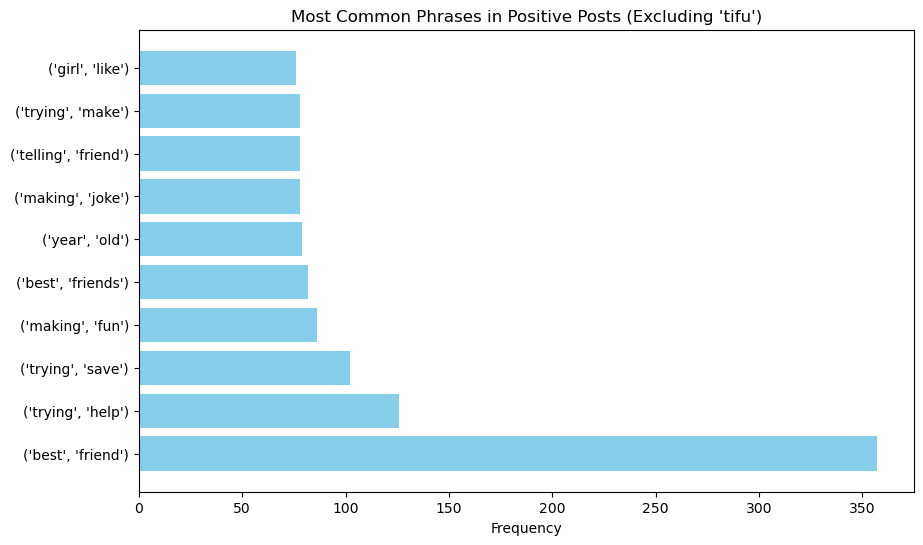

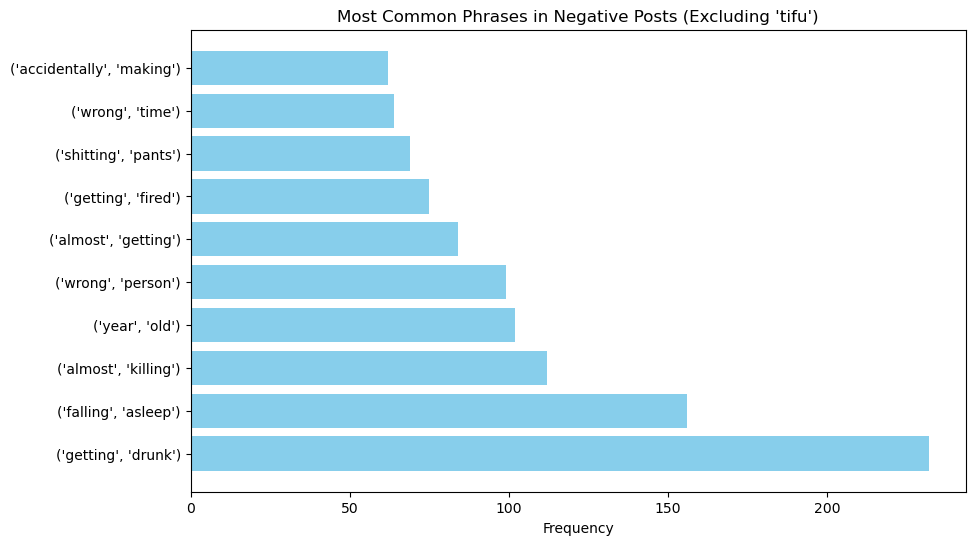

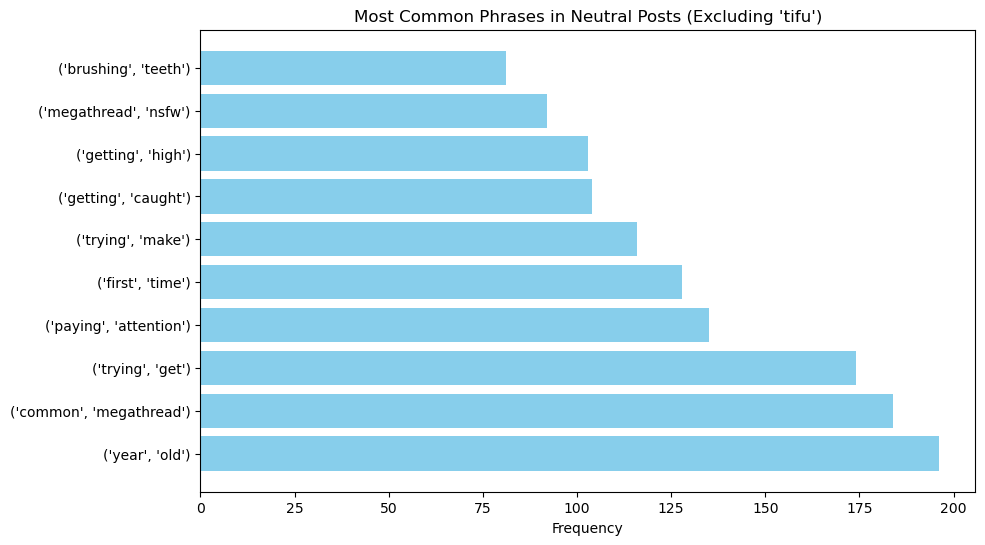

In [34]:
sentiments = ['positive', 'negative', 'neutral']

for sentiment in sentiments:
    plot_most_common_phrases(tifu, sentiment, excluded_word='tifu')

#### With the distribution of the engagements over the sentiment categories we can see that negative posts got more engagement.


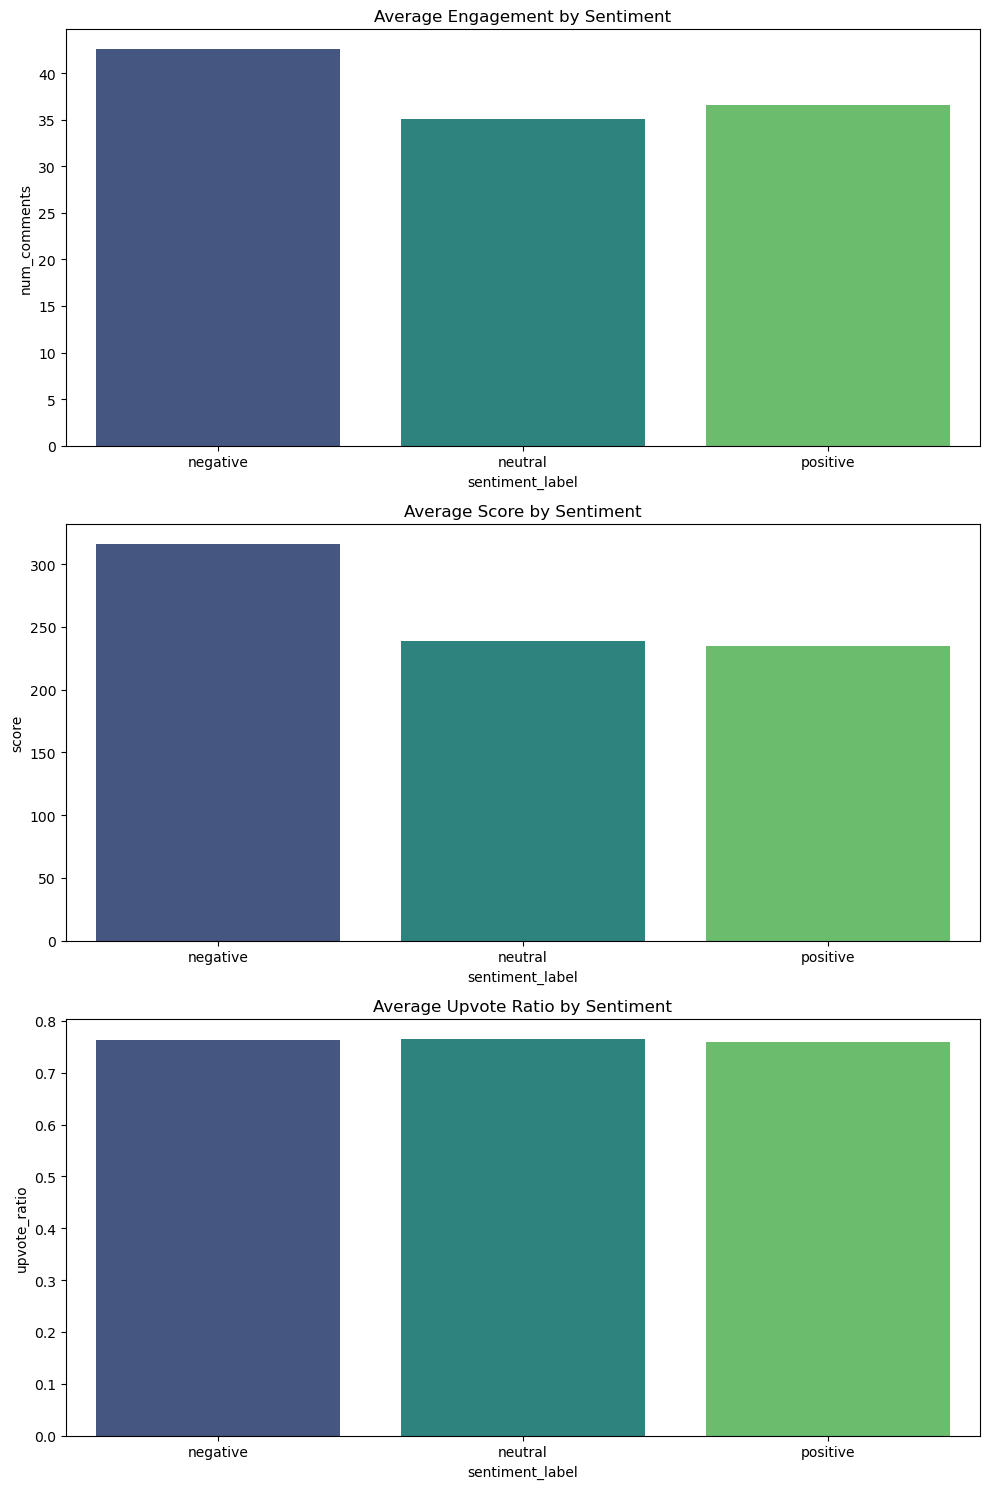

In [35]:
grouped_data = tifu.groupby('sentiment_label')
average_metrics = grouped_data[['num_comments', 'score', 'upvote_ratio']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(10, 15))
sns.barplot(x='sentiment_label', y='num_comments', data=average_metrics, palette='viridis', ax=axes[0])
axes[0].set_title('Average Engagement by Sentiment')

sns.barplot(x='sentiment_label', y='score', data=average_metrics, palette='viridis', ax=axes[1])
axes[1].set_title('Average Score by Sentiment')

sns.barplot(x='sentiment_label', y='upvote_ratio', data=average_metrics, palette='viridis', ax=axes[2])
axes[2].set_title('Average Upvote Ratio by Sentiment')

plt.tight_layout()
plt.show()

#### I investigated if there are any relationships between post length, score and upvote ratio, there seemed to be some correlation. So I created some regression models using the least squared method and analyzed R square and Adjusted R squared values to see what percentage of the post length can be explained by the score and upvote ratio. The regression model on the first order did not give a very good R squared value so I tried the polynomial version of it. The R square values got better but still not acceptable enough. 

In [36]:
correlation_with_context = tifu[['score', 'upvote_ratio', 'post_length']].corr()

correlation_with_context

score  upvote_ratio  post_length
score         1.000000      0.095078     0.075371
upvote_ratio  0.095078      1.000000     0.128359
post_length   0.075371      0.128359     1.000000

In [37]:

X = sm.add_constant(tifu[['score','upvote_ratio']])
model = sm.OLS(tifu['post_length'], X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            post_length   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     836.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:35:47   Log-Likelihood:            -5.5898e+05
No. Observations:               79949   AIC:                         1.118e+06
Df Residuals:                   79946   BIC:                         1.118e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          177.5321      4.084     43.475   

In [38]:
tifu['upvote_ratio_squared'] = np.square(tifu['upvote_ratio'])
tifu['score_squared'] = np.square(tifu['score'])
X_poly = sm.add_constant(tifu[['upvote_ratio', 'upvote_ratio_squared','score', 'score_squared']])
model_poly = sm.OLS(tifu['post_length'], X_poly)
results_poly = model_poly.fit()

# Display polynomial regression results
print(results_poly.summary())


                            OLS Regression Results                            
Dep. Variable:            post_length   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     481.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:35:48   Log-Likelihood:            -5.5885e+05
No. Observations:               79949   AIC:                         1.118e+06
Df Residuals:                   79944   BIC:                         1.118e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  104.3194 

In [39]:
tifu['interaction_term'] = tifu['upvote_ratio'] * tifu['score']

X_interaction = sm.add_constant(tifu[['upvote_ratio', 'score', 'interaction_term']])
model_interaction = sm.OLS(tifu['post_length'], X_interaction)
results_interaction = model_interaction.fit()

# Display interaction term regression results
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:            post_length   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     558.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:35:48   Log-Likelihood:            -5.5898e+05
No. Observations:               79949   AIC:                         1.118e+06
Df Residuals:                   79945   BIC:                         1.118e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              177.7178      4.092  

### I decided to create 5 categories by the K-means clustering. By using PCA principle component analysis and setting it to 2 we reduce the dimension to 2 for quicker and easier computation. There are not very distinct borders to these clusters created, and some of them seem to be not classified very well, but I thought k-means would be a good algorithm to create categories.

/Users/senairemtoka/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


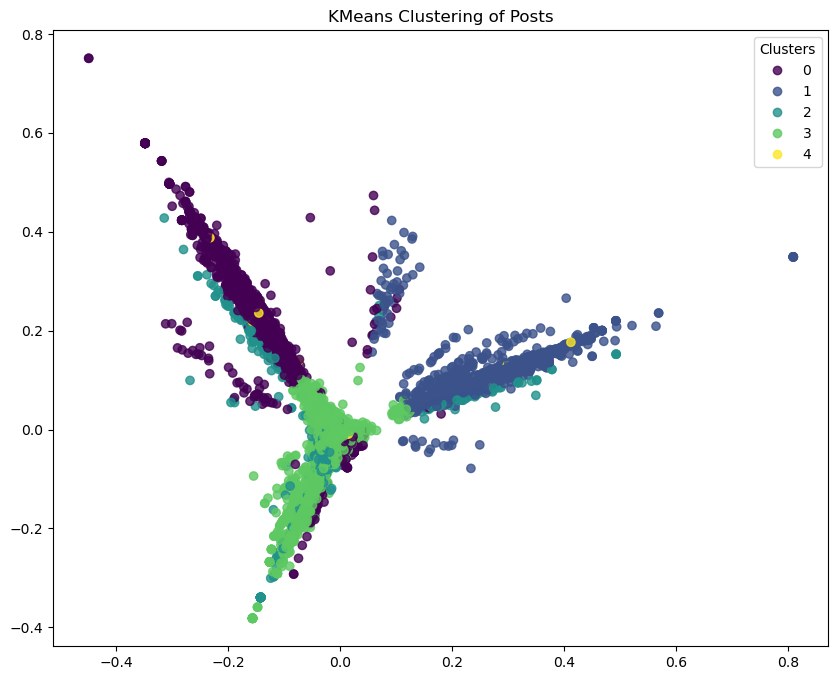

In [40]:
X = tifu['title']

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.8)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('KMeans Clustering of Posts')
plt.show()

tifu['category'] = kmeans.labels_


### I printed the first 10 entries for every category I cretaed to get an idea about how they are clustered. For example Cluster 2 seems to be about the concept 'work' while Cluster 4 seems to be about kitchen and food.

In [41]:
cluster_df = pd.DataFrame({'title': X, 'category': kmeans.labels_})

for cluster_label in range(num_clusters):
    print(f"\nTitles in Cluster {cluster_label}:\n")
    print(cluster_df[cluster_df['category'] == cluster_label]['title'].head(10))



Titles in Cluster 0:

26     Chatting to my future father in law, made it s...
35     TIFU Girl gave me head, I thought I came...I w...
44     TIFU by sleeping with a girl other than the gi...
47                             TIFU by fingering a girl.
58     *UPDATE* TIFU by kissing a girl and embarrasin...
63     TIFU By forgetting girl's number in locker ove...
85      TIFU by Telling a girl I hope she burns herself.
90     TIFU (2 weeks ago) by getting in a fight with ...
110                   TIFU By Hitting on my Burrito Girl
111                   TIFU by getting in a car accident.
Name: title, dtype: object

Titles in Cluster 1:

19              TIFU by trying to microwave french fries
70                 TIFU by trying to jump over a wall...
96     TIFU by trying to help an elderly man use IE o...
150                     TIFU by trying to defend myself.
167    TIFU by trying to be encouraging to a teenage ...
181              TIFU trying to send nude pics to the GF
206         TIF

In [42]:
cluster_centers = kmeans.cluster_centers_
num_top_terms = 10
for i in range(num_clusters):
    print(f"\nCluster {i + 1} Top Terms:\n")
    cluster_center_indices = cluster_centers[i, :].argsort()[:-(num_top_terms+1):-1]
    for ind in cluster_center_indices:
        ind = int(ind)
        print(f"{vectorizer.get_feature_names_out()[ind]}")


Cluster 1 Top Terms:

getting
girl
tifu
drunk
high
caught
car
asking
stuck
telling

Cluster 2 Top Terms:

trying
tifu
make
help
save
friend
girl
funny
impress
clean

Cluster 3 Top Terms:

work
tifu
going
getting
leaving
taking
late
day
trying
early

Cluster 4 Top Terms:

tifu
going
friend
nsfw
making
having
taking
girlfriend
telling
eating

Cluster 5 Top Terms:

setting
pizza
tifu
alarm
eating
house
ordering
nearly
kitchen
hut


### I got the engagement averages for each category that I got. We see that the category 0 got the most comments and score and it got the least upvote ratio. We can look at the most used words for it above and understand that category is about getting in trouble, getting caught, getting high, drunk and see why it got more engagement. 

In [43]:
engagement_by_category = tifu.groupby('category')[['score', 'upvote_ratio', 'num_comments']].mean()

engagement_by_category

score  upvote_ratio  num_comments
category                                        
0         298.402254      0.744094     47.764622
1         223.076565      0.783626     31.269258
2         227.199896      0.783432     34.742991
3         257.506538      0.762811     36.866343
4         254.103970      0.781871     39.404537

### I visualized the engagement metrics by category as well. 

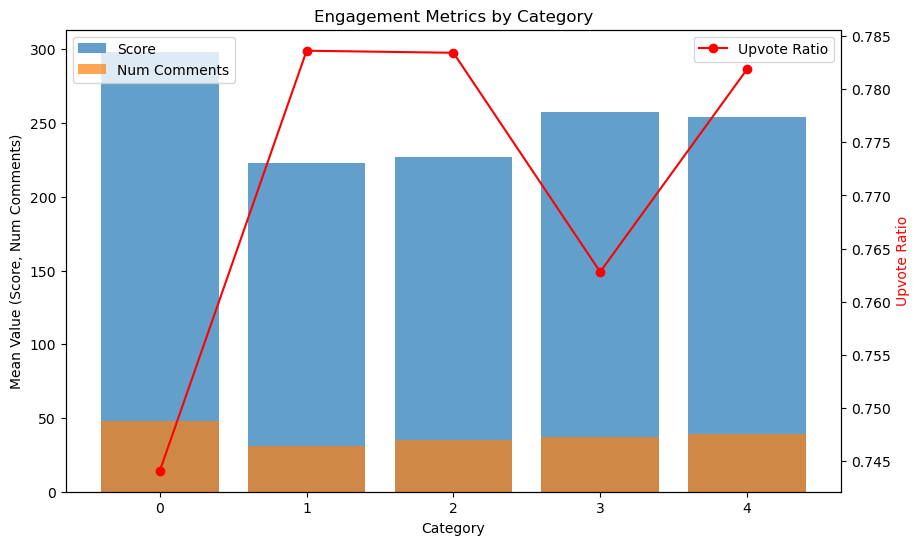

In [44]:
engagement_by_category = tifu.groupby('category')[['score', 'upvote_ratio', 'num_comments']].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(engagement_by_category.index, engagement_by_category['score'], label='Score', alpha=0.7)
ax1.bar(engagement_by_category.index, engagement_by_category['num_comments'], label='Num Comments', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(engagement_by_category.index, engagement_by_category['upvote_ratio'], color='red', marker='o', label='Upvote Ratio')

ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Value (Score, Num Comments)')
ax2.set_ylabel('Upvote Ratio', color='red')
plt.title('Engagement Metrics by Category')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### I wanted to also see if we can categorize the titles if they give a statement or if they are humorous or asking a question. I couldn't figure out how to do it by sentiment so I gave the keywords.

In [45]:
tifu['title_category'] = 'other'  

humor_keywords = ['funny', 'hilarious', 'joke', 'humor', 'laugh']
question_keywords = ['what', 'why', 'how', 'when', 'where', 'which', 'who', '?']
statement_keywords = ['TIFU by', 'today I', 'yesterday I', 'tonight I', 'this morning I', 'now I']

for index, row in tifu.iterrows():
    title_lower = row['title'].lower()
    
    if any(keyword in title_lower for keyword in humor_keywords):
        tifu.at[index, 'title_category'] = 'humor'
    elif any(keyword in title_lower for keyword in question_keywords):
        tifu.at[index, 'title_category'] = 'question'
    elif any(keyword in title_lower for keyword in statement_keywords):
        tifu.at[index, 'title_category'] = 'statement'

### I got the average engagement metrics for each title category and then visualized them. It makes sense that questions got more comments and humorous posts got higher score.

In [46]:
grouped_category = tifu.groupby('title_category')
mean_engagement_category = grouped_category[['score', 'upvote_ratio', 'num_comments']].mean()

mean_engagement_category

score  upvote_ratio  num_comments
title_category                                        
humor           316.677591      0.765146     38.132861
other           252.354536      0.763681     36.657794
question        327.722874      0.756008     46.951613

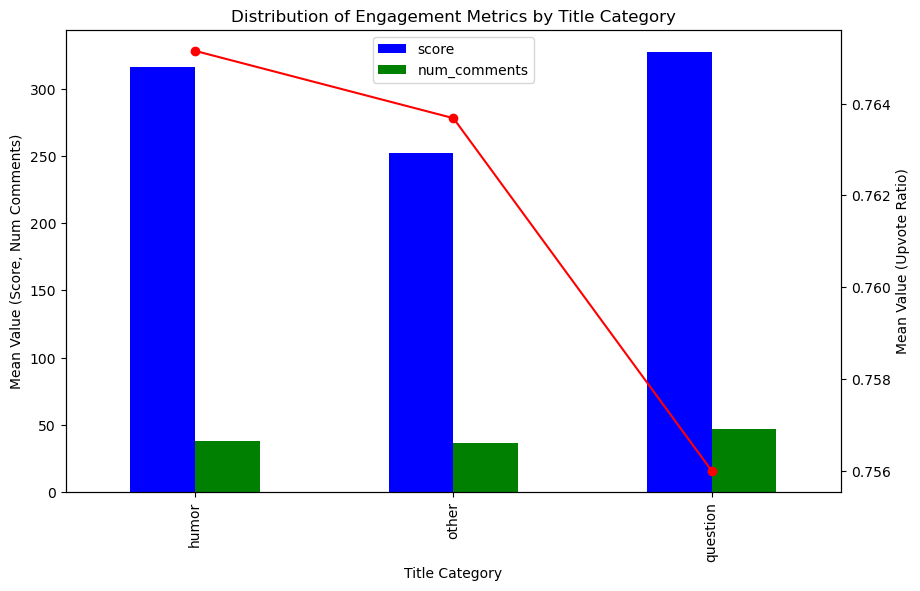

In [47]:
fig, ax1 = plt.subplots(figsize=(10, 6))

mean_engagement_category[['score', 'num_comments']].plot(kind='bar', ax=ax1, color=['blue', 'green'])
ax1.set_xlabel('Title Category')
ax1.set_ylabel('Mean Value (Score, Num Comments)')

ax2 = ax1.twinx()
mean_engagement_category['upvote_ratio'].plot(kind='line', marker='o', color='red', ax=ax2)
ax2.set_ylabel('Mean Value (Upvote Ratio)')

plt.title('Distribution of Engagement Metrics by Title Category')

plt.show()

### Giving the keywords manually is not very successful in categorizing these as other category propably contains humor and question sentences we could not detect. But the distribution came out like this:

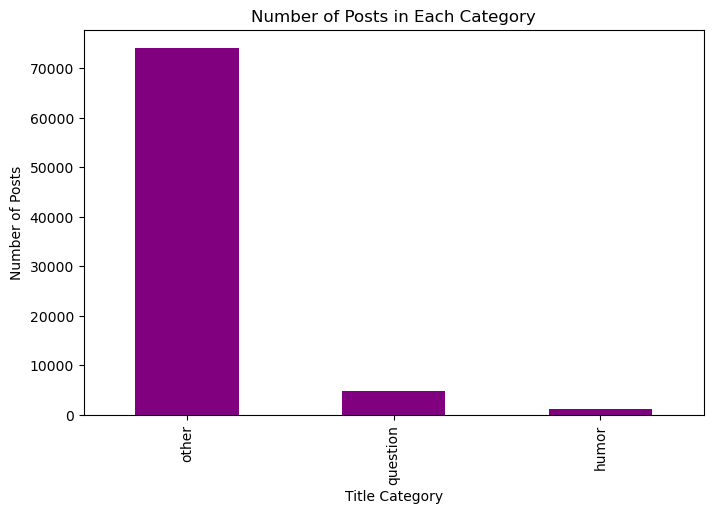

In [48]:
category_counts = tifu['title_category'].value_counts()

fig, ax_count = plt.subplots(figsize=(8, 5))

category_counts.plot(kind='bar', ax=ax_count, color='purple')
ax_count.set_xlabel('Title Category')
ax_count.set_ylabel('Number of Posts')
ax_count.set_title('Number of Posts in Each Category')

plt.show()


### To see if a post having 'tldr' impact any of the engagement metrics, I plotted them against each other . The ratio of having a tldr and not having tldr is quite close and we can probably say the posts that have tldr receive more comments.

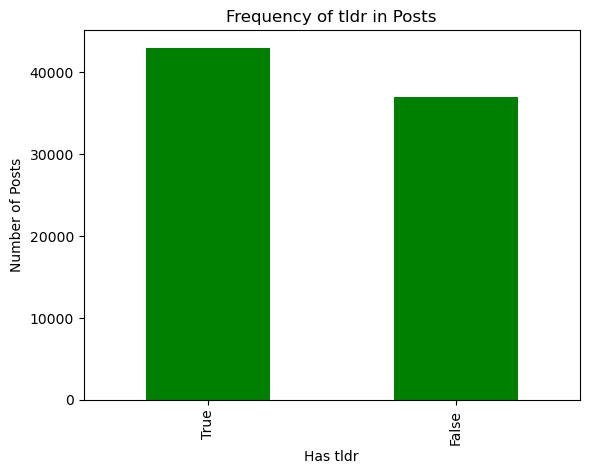

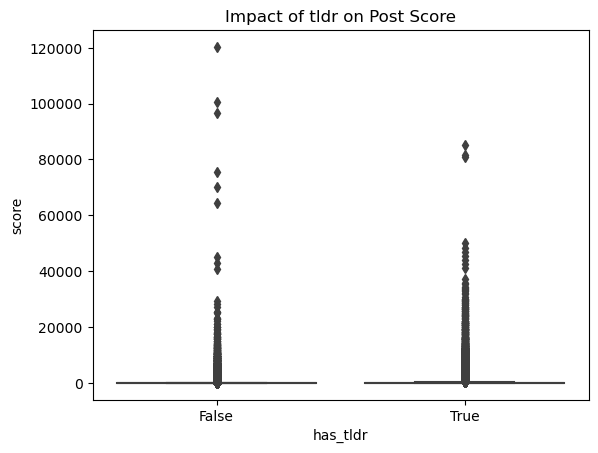

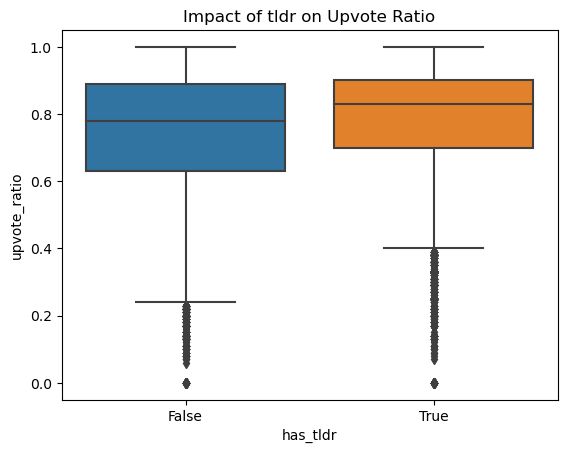

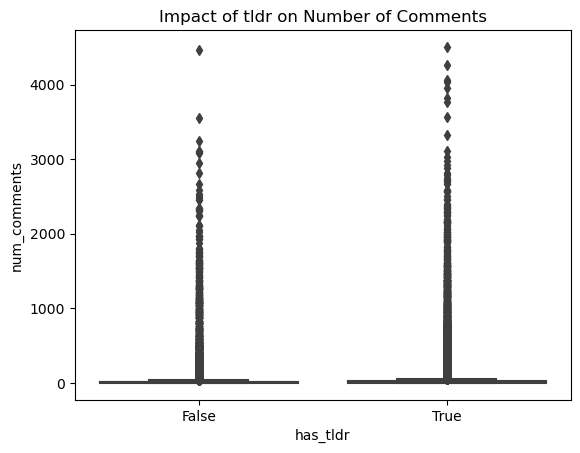

has_tldr
True     42984
False    36965
Name: count, dtype: int64


In [49]:
tifu['has_tldr'] = np.where((tifu['tldr'].notnull()) & (tifu['tldr'].str.strip() != 'none'), True, False)
tldr_frequency = tifu['has_tldr'].value_counts()
tldr_frequency.plot(kind='bar', color='green')
plt.title('Frequency of tldr in Posts')
plt.xlabel('Has tldr')
plt.ylabel('Number of Posts')
plt.show()

sns.boxplot(x='has_tldr', y='score', data=tifu)
plt.title('Impact of tldr on Post Score')
plt.show()

sns.boxplot(x='has_tldr', y='upvote_ratio', data=tifu)
plt.title('Impact of tldr on Upvote Ratio')
plt.show()

sns.boxplot(x='has_tldr', y='num_comments', data=tifu)
plt.title('Impact of tldr on Number of Comments')
plt.show()

print(tldr_frequency)



### We can see that over the years, the most used 10 words almost remain the same, just changing orders and go around the same themes of accidentally, friends or work. 

In [50]:
tifu['year'] = tifu['created_utc'].dt.year  

stop_words = set(stopwords.words('english'))
stop_words.add('tifu')  
vectorizer = CountVectorizer(stop_words=list(stop_words))  
X = vectorizer.fit_transform(tifu['title'].str.lower())

word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq['year'] = tifu['year']

num_top_words = 10  
for year, group in word_freq.groupby('year'):
    print(f"\nMost Used Words in {year}:\n")
    top_words = group.drop('year', axis=1).sum().sort_values(ascending=False).head(num_top_words)
    print(top_words)


Most Used Words in 2013:

getting         188
trying          179
friend          153
work            127
girl            116
accidentally    109
car             105
going           104
making           94
taking           90
dtype: int64

Most Used Words in 2014:

getting         856
trying          757
nsfw            737
friend          604
girl            560
work            471
girlfriend      456
making          452
telling         438
accidentally    431
dtype: int64

Most Used Words in 2015:

trying        1985
getting       1754
nsfw          1439
friend        1350
girl          1244
going         1150
making        1040
telling       1025
work           928
girlfriend     871
dtype: int64

Most Used Words in 2016:

trying     849
getting    646
nsfw       433
making     348
friend     323
going      308
car        293
work       287
taking     274
using      250
dtype: int64

Most Used Words in 2017:

trying          546
getting         520
almost          233
nsfw         

### I wanted to also use the Named Entity Recongition to see if there are some specific entities mentioned frequently. However the result that I got was not satisfiying. The only result that makes sense as an entity is Reddit, maybe christmas and NSFW.

In [51]:
nlp = spacy.load('en_core_web_sm')

ner_results = tifu['title'].apply(lambda x: [ent.text for ent in nlp(x).ents])
entity_counts = Counter([entity for entities in ner_results for entity in entities])
num_top_entities = 10
for entity, count in entity_counts.most_common(num_top_entities):
    print(f"{entity}: {count} times")


NSFW: 703 times
first: 561 times
TIFU: 324 times
two: 282 times
one: 275 times
Reddit: 213 times
2: 171 times
Christmas: 169 times
half: 165 times
3: 118 times


## AITA Text Analysis

#### Importing the required libraries.

In [52]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud

In [53]:
aita = pd.read_csv('datasets/aita_dataset.csv')

In [54]:
aita

id                                              title  \
0        4pcrle          aita for wanting to celebrate my birthday   
1        89o0sd                                     aita for being   
2        8d5qpg           aita for getting mad at an autistic kid?   
3        8f40sm         aita for playing a prank on my housemates?   
4        8hh8q7  aita for asking my boyfriend to not be in the ...   
...         ...                                                ...   
270704  128nxuw    aita for not asking family to restart business.   
270705  128o0cg  aita for not buying my brother a game with my ...   
270706  128o12x  wibta if i take my mother to court over my col...   
270707  128o5ag  aita for refusing to kiss my girlfriend after ...   
270708  128o5aw       aita for visiting my parents with my newborn   

                                                     text verdict  \
0       i turned 30 on monday. i don't have a problem ...     nta   
1       feed up with my gf. for 6 years ive supported ...     nta   
2        so at the start of the school year. like any ...     nta   
3       sorry for format, using mobile. so a little bi...     nta   
4       so next week is finals week at my university a...     nta   
...                                                   ...     ...   
270704  my great grandma gigi, ran a business back in ...     nta   
270705  so my (15f) birthday was a few days ago and my...     nta   
270706  i have already posted this story but now i’m p...     nta   
270707  character line-up: me (32f), and my girlfriend...     yta   
270708  for some context, i had a baby in january. cra...     nta   

                                                 comment1  \
0       i think you know your nta, it seems like you j...   
1       nta dude, call a hotline and report her, then ...   
2       it's tough but no you're nta. you are not trai...   
3       nta getting mad over walking up some stairs is...   
4       nta. i ask my boyfriend to leave the room when...   
...                                                   ...   
270704  nta. nobody wanted the business or brand until...   
270705  nta. why should you spend your birthday money ...   
270706  nta - just so i understand, your late grandfat...   
270707  hmmm. i’m sorry- but i’m going very soft yta. ...   
270708  nta. go anyway. you have every right to visit ...   

                                                 comment2  score  
0       definitely nta. i suffer from depression and a...     15  
1       nta. i would quite literally lose my mind in y...     63  
2       nta. my brother is autistic and i love him to ...    329  
3       not the most genius prank ever concocted, but ...     70  
4       nta. that’s ridiculous. there’s no reason he s...     18  
...                                                   ...    ...  
270704  nta but, you better trademark the name before ...     12  
270705  of course nta sweetie! your brother is an adul...     23  
270706  110% nta.  you need to act quickly to protect ...    708  
270707  french kiss and a kiss is totally different on...      0  
270708  stop talking to your sister about this. it’s n...    153  

[270709 rows x 7 columns]

## Analysis on most commonly used words in the post titles
-----------------------------------------------------------------------------------------------

I am getting the titles from the dataframe.

In [55]:
aita_titles = aita['title']

In [56]:
aita_titles[0]

'aita for wanting to celebrate my birthday'

#### First, I need to tokenize each title. In the function below, I am tokenizing each title into words and putting all words into a list.

In [57]:
def tokenize(titles_list):
    tokenized_titles = []
    for title in titles_list:
        tokenized_title = nltk.word_tokenize(title) 
        tokenized_titles.extend(tokenized_title)
    return tokenized_titles

In [58]:
aita_titles_tokenized = tokenize(aita_titles)

In [59]:
len(aita_titles_tokenized)

3579773

#### Before counting and finding the most common words, I'd like to remove all stopwords and punctuation.

In [60]:
def filtered(tokenized):
    stop_words = set(stopwords.words('english'))
    filtered_titles0 = [word for word in tokenized if not word.lower() in stop_words]
    filtered_titles00 = [re.sub(r'[^\w\s]', '', item) for item in filtered_titles0]
    filtered_titles000 = list(filter(None, filtered_titles00))
    aita_filtered_titles = [title for title in filtered_titles000 if ((title != 'aita' and title != 's') and (title != 'nt' and title != 'wibta')
                                                                     and title != 'if')]
    return aita_filtered_titles

In [61]:
aita_filtered_titles = filtered(aita_titles_tokenized)

#### I tokenized and filtered the titles. Now I can make a wordcloud to visualize the most used words.

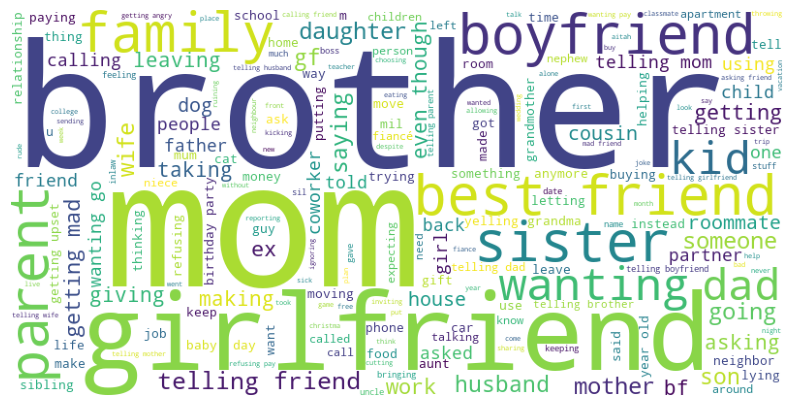

In [62]:
aita_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(aita_filtered_titles))
plt.figure(figsize=(10, 8))
plt.imshow(aita_wordcloud)
plt.axis('off')
plt.show()

#### I can see the most used words in the wordcloud but I want to make a deeper analysis.

Here I am counting the 10 most common words with `Counter()`.

In [63]:
aita_word_counts = Counter(aita_filtered_titles).most_common(20)

aita_word_counts elements are tuples. I need to convert them into a list in order to use them.

In [64]:
def tuple_to_list(counts):
    count_list = []
    for tuples in counts:
        count = list(tuples)
        count_list.append(count)
    return count_list

In [65]:
aita_word_counts_list = tuple_to_list(aita_word_counts)

These are the top 20 most used words in post titles:

In [66]:
aita_word_counts_list

[['friend', 31984],
 ['telling', 28218],
 ['wanting', 25968],
 ['mom', 15075],
 ['sister', 14616],
 ['family', 11329],
 ['getting', 11317],
 ['asking', 11059],
 ['boyfriend', 10503],
 ['refusing', 10476],
 ['brother', 10383],
 ['friends', 9878],
 ['dad', 9314],
 ['girlfriend', 8411],
 ['parents', 8201],
 ['wedding', 7807],
 ['mother', 7466],
 ['husband', 7219],
 ['calling', 7003],
 ['go', 6874]]

#### I want to check if there's a relationship between the score of the posts and the number of most common words each title has.

In the function below I am tokenizing each title on its own and counting the common words in titles individually.

In [67]:
def count_common(titles_list, most_common_words):
    title_counts = []
    for title in titles_list:
        tokenized_title = nltk.word_tokenize(title)
        common_words_count = sum(1 for word in tokenized_title if word.lower() in [common[0] for common in most_common_words])
        title_counts.append(common_words_count)
    return title_counts

In [68]:
aita_common_word_counts = count_common(aita_titles, aita_word_counts_list)

Getting the 'score' attribute.

In [69]:
aita_scores = aita['score']

Now I can investigate whether the most used words or phrases in the titles have any relation to the 'score' metric.

In [70]:
word_score_df = {'Title': aita['title'], 'Most Common Word Count': aita_common_word_counts, 'Score': aita_scores}

In [71]:
aita_title_scores = pd.DataFrame(word_score_df)

In [72]:
aita_title_scores

Title  \
0               aita for wanting to celebrate my birthday   
1                                          aita for being   
2                aita for getting mad at an autistic kid?   
3              aita for playing a prank on my housemates?   
4       aita for asking my boyfriend to not be in the ...   
...                                                   ...   
270704    aita for not asking family to restart business.   
270705  aita for not buying my brother a game with my ...   
270706  wibta if i take my mother to court over my col...   
270707  aita for refusing to kiss my girlfriend after ...   
270708       aita for visiting my parents with my newborn   

        Most Common Word Count  Score  
0                            1     15  
1                            0     63  
2                            1    329  
3                            0     70  
4                            2     18  
...                        ...    ...  
270704                       2     12  
270705                       1     23  
270706                       1    708  
270707                       2      0  
270708                       1    153  

[270709 rows x 3 columns]

#### To investigate the relationship, I can make a scatter plot.

### Scatter Plot

In [73]:
aita_title_scores['Most Common Word Count'].value_counts()

Most Common Word Count
1    108301
0     97397
2     52159
3     11267
4      1442
5       129
6        11
7         3
Name: count, dtype: int64

<Figure size 600x1200 with 0 Axes>

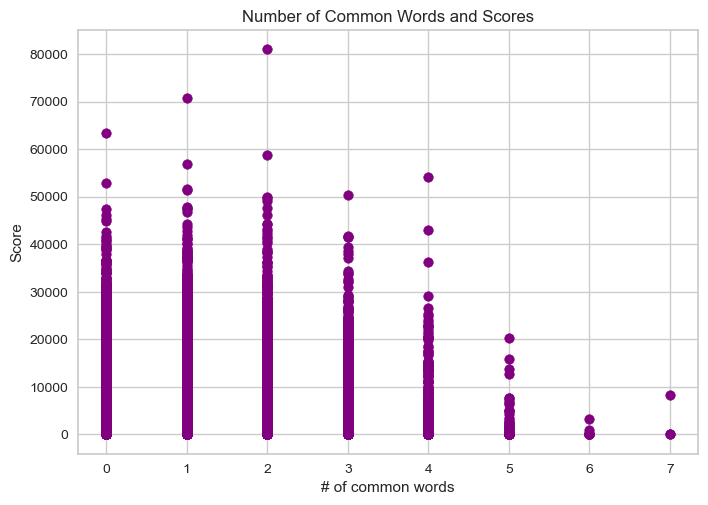

<Figure size 600x1200 with 0 Axes>

In [74]:
plt.scatter(aita_title_scores['Most Common Word Count'], aita_title_scores['Score'], color = 'purple')
plt.title('Number of Common Words and Scores')
plt.xlabel('# of common words')
plt.ylabel('Score')
plt.figure(figsize=(6,12))

#### In the scatter plot above I can see that the more common words the posts have the lower their scores are. If the post has 0, 1 or 2 common words they get better scores. From here I can infer that maybe people are more inclined to engage with new things rather than things they constantly see on the subreddit.

#### I can investigate the relationship with correlation as well.

### **Correlation Coefficient** <br>
The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. <br>
A coefficient of 1 shows a perfect positive correlation, or a direct relationship. <br>
A correlation coefficient of 0 means there is no linear relationship. <br>
And finally, a correlation coefficient of -1 means there is perfect negative or inverse correlaation. <br>
We are going to test the linear relationship on the data with the **Pearson's Correlation Coefficient**. <br>
<br>
**Pearson's Correlation Coefficient** <br>
The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.
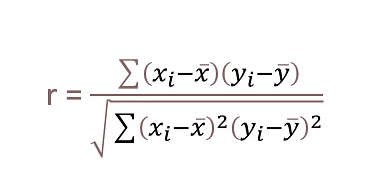

In [75]:
aita_pearson_title = stats.pearsonr(aita_title_scores['Most Common Word Count'], aita_title_scores['Score'])
aita_pearson_title

PearsonRResult(statistic=0.04215920119238595, pvalue=9.674825128498172e-107)

#### The correlation level seems to be very low. Therefore we can say that there are no *linear* relationship between having common words in title and getting a high score on the post.

## Analysis on length of a post and its engagement
------------------------------------------------------------------------------------------------------------------------

Getting the 'text' attribute of the dataset.

In [76]:
aita_text = aita['text']

Function below finds the length of all posts.

In [77]:
def get_aita_length(texts):
    lengths = []
    for text in texts:
        length = len(text)
        lengths.append(length)
    return lengths

In [78]:
aita_text_length = get_aita_length(aita_text)

We have the length of all posts, and we already had the scores from the previous analysis. 
Now we can take a look at the relationship between those.

### Scatter Plot


Text(0, 0.5, 'Score')

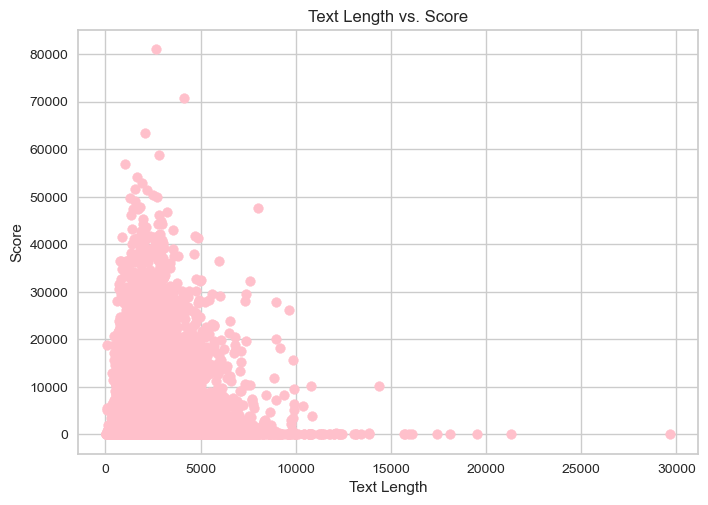

In [79]:
plt.scatter(aita_text_length, aita_scores, color = 'pink')
plt.title('Text Length vs. Score')
plt.xlabel('Text Length')
plt.ylabel('Score')

#### I notice that as the length of the post increases, the score of the post goes down. Shorter posts have received more engagement. I guess this can give us insight about the attention span of individuals.

### Pearson's Correlation Coefficient

In [80]:
pearson_text = stats.pearsonr(aita_text_length, aita_scores)
pearson_text

PearsonRResult(statistic=0.11261372749664077, pvalue=0.0)

#### There is no linear relationship however we can always find a curve to fit our data. Let's look at Polynomial Regression.

### Polynomial Regression 
To fit a curve to our data, we need to learn the parameters of the curve first. <br>
To generate polynomial features we are going to build a polynomial regression model. Let's fit a 2nd order polynomial regression to the data first.

#### 2nd order polynomial:

In [81]:
from sklearn import set_config
set_config(transform_output="pandas")

We need to split the dataset into train and test sets to perform and test regression.

In [82]:
text_train, text_test, score_train, score_test = train_test_split(aita_text_length, aita_scores, test_size=0.2, random_state=2002)

Let's get the polynomial features first.

In [83]:
text_train_reshaped = np.array(text_train).reshape(-1, 1)
poly2 = PolynomialFeatures(degree=2, include_bias=False)
text_train_poly2 = poly2.fit_transform(text_train_reshaped)
text_train_poly2.head()

x0       x0^2
0   293.0    85849.0
1  2617.0  6848689.0
2  2168.0  4700224.0
3  2865.0  8208225.0
4  1313.0  1723969.0

In [84]:
text_test_reshaped = np.array(text_test).reshape(-1, 1)
text_test_poly2 = poly2.transform(text_test_reshaped)
text_test_poly2.head()

x0       x0^2
0  2842.0  8076964.0
1  1933.0  3736489.0
2  1920.0  3686400.0
3  2501.0  6255001.0
4  2410.0  5808100.0

Now we can fit the model.

In [85]:
regr2 = LinearRegression()
regr2.fit(text_train_poly2, score_train)

LinearRegression()

And get the predicted values.

In [86]:
score_train_pred2 = regr2.predict(text_train_poly2)
score_test_pred2 = regr2.predict(text_test_poly2)

We can test the prediction with R^2 score.

In [87]:
print('Train R2: %.4f' % r2_score(score_train, score_train_pred2))
print('Test R2: %.4f'  % r2_score(score_test, score_test_pred2))  

Train R2: 0.0124
Test R2: 0.0139


#### R^2 score is very low. 2nd order polynomial doesn't fit our data well. I can't keep on trying for different order polynomials by hand. So it's best to create a pipeline that calculates polynomial features for n degrees.

#### Higher Order Polynomials:

In [88]:
r2_scores = {}
polynomial = np.arange(1,15)

for i in range(len(polynomial)):
    pipe = make_pipeline(
    PolynomialFeatures(degree = polynomial[i], include_bias=False), 
    LinearRegression()
    )
    
    pipe.fit(text_train_reshaped, score_train)
    
    r2_train = pipe.score(text_train_reshaped, score_train)
    r2_test = pipe.score(text_test_reshaped, score_test)
    r2_scores[i] = {'p': polynomial[i],
                 'R2_Train': r2_train, 
                 'R2_Test': r2_test
                  }
    
    
r2_scores_df = pd.DataFrame.from_dict(r2_scores).T
r2_scores_df

p  R2_Train   R2_Test
0    1.0  0.012359  0.013984
1    2.0  0.012404  0.013888
2    3.0  0.012658  0.014286
3    4.0  0.012987  0.014364
4    5.0  0.012995  0.014399
5    6.0  0.013112  0.014115
6    7.0  0.009831  0.011024
7    8.0  0.000177  0.000547
8    9.0  0.000028  0.000143
9   10.0  0.000004  0.000026
10  11.0  0.000001 -0.000007
11  12.0  0.000001 -0.000016
12  13.0  0.000002 -0.000017
13  14.0  0.000002 -0.000015

#### R^2 scores are very low but 5th or 6th order polynomial seems to be the best.  This analysis unfortunately fails.

## Analysis on verdict and score
------------------------------------------------------------------------------------------------------------------------------

In [89]:
aita_verdict = aita['verdict']

In [90]:
aita_verdict.value_counts()

verdict
nta    203079
yta     47408
nah     13342
esh      6880
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Verdicts')

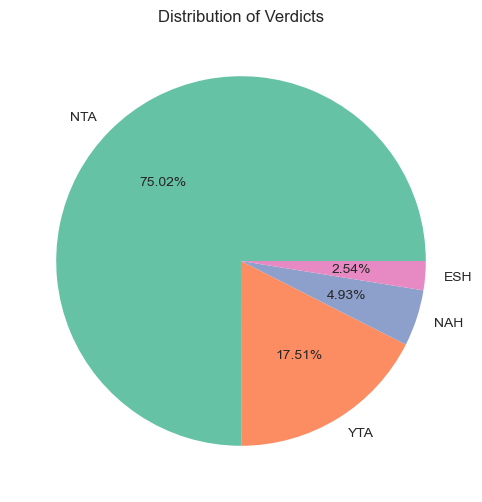

In [91]:
plt.figure(figsize=(6,6))
plt.pie(aita_verdict.value_counts(), labels = ['NTA', 'YTA', 'NAH', 'ESH'], autopct='%1.2f%%', 
        textprops={'fontsize':10}, colors=sns.color_palette('Set2')
       )
plt.title('Distribution of Verdicts')

#### The verdict is 'NTA' 75% percent of the time. 

In [92]:
aita_verdict_score_df = {'Verdict': aita['verdict'], 'Score': aita_scores}

In [93]:
aita_verdict_scores = pd.DataFrame(aita_verdict_score_df)
aita_verdict_scores

Verdict  Score
0          nta     15
1          nta     63
2          nta    329
3          nta     70
4          nta     18
...        ...    ...
270704     nta     12
270705     nta     23
270706     nta    708
270707     yta      0
270708     nta    153

[270709 rows x 2 columns]

In [94]:
verdict_scores = aita_verdict_scores.groupby('Verdict')['Score'].mean()

In [95]:
verdict_scores_df = verdict_scores.to_frame()
verdict_scores_df

Score
Verdict            
esh      403.842878
nah      226.362090
nta      689.892362
yta      394.589605

#### Seems like posts with the verdict 'NTA' got the most engagament.

## Sentiment analysis
-------------------------------------------------------------------------------------------------------------------------------

#### Doing a sentiment analysis on text of the posts.

In [96]:
def analyze_sentiment(your_text):
    sentiments = []
    sia = SentimentIntensityAnalyzer()
    for text in your_text:
        sentiment_score = sia.polarity_scores(text)['compound']
        sentiments.append(sentiment_score)
    
    return sentiments

In [97]:
aita_sentiments = analyze_sentiment(aita_text)

In [98]:
aita['sentiment'] = aita_sentiments

Assigning positive, negative or neutral labels on the sentiment scores.

In [99]:
aita['sentiment_label'] = aita['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
aita[['title', 'sentiment', 'sentiment_label']]

title  sentiment  \
0               aita for wanting to celebrate my birthday     0.9552   
1                                          aita for being    -0.7783   
2                aita for getting mad at an autistic kid?    -0.9821   
3              aita for playing a prank on my housemates?     0.9724   
4       aita for asking my boyfriend to not be in the ...    -0.9844   
...                                                   ...        ...   
270704    aita for not asking family to restart business.     0.9801   
270705  aita for not buying my brother a game with my ...    -0.9438   
270706  wibta if i take my mother to court over my col...     0.9419   
270707  aita for refusing to kiss my girlfriend after ...     0.9670   
270708       aita for visiting my parents with my newborn    -0.5554   

       sentiment_label  
0             positive  
1             negative  
2             negative  
3             positive  
4             negative  
...                ...  
270704        positive  
270705        negative  
270706        positive  
270707        positive  
270708        negative  

[270709 rows x 3 columns]

I am counting the number of positive, negative and neutral labels.

In [100]:
aita_sentiment_counts = aita['sentiment_label'].value_counts()
aita_sentiment_counts

sentiment_label
positive    137235
negative    133240
neutral        234
Name: count, dtype: int64

I want to visualize this with a bar plot.

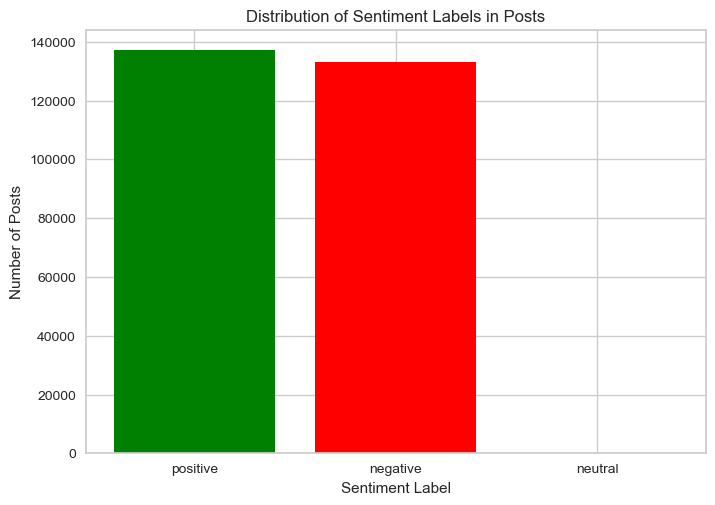

In [101]:
colors = ['green', 'red', 'grey']
plt.bar(aita_sentiment_counts.index, aita_sentiment_counts.values, color=colors)
plt.title('Distribution of Sentiment Labels in Posts')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.show()

#### Number of posts with positive and negative sentiments are almost the same. Number of posts with neutral sentiments are very low compared to negative & positive sentiments. This actually makes sense because r/AmITheAsshole is a place where you can learn whether you did right or wrong. Readers decide if you are the asshole 'YTA' and not the asshole 'NTA'.

### Now, I want to see if the sentiments of the posts align with the 'verdict' column. 

In [102]:
aita_sentiment_labels = aita['sentiment_label']

In [103]:
verdict_sentiment_df = {'Verdict': aita_verdict, 'Sentiment Label': aita_sentiment_labels}

I made a dataframe that has the verdicts on one column and the sentiment labels on the other column.

In [104]:
verdict_sentiment = pd.DataFrame(verdict_sentiment_df)
verdict_sentiment

Verdict Sentiment Label
0          nta        positive
1          nta        negative
2          nta        negative
3          nta        positive
4          nta        negative
...        ...             ...
270704     nta        positive
270705     nta        negative
270706     nta        positive
270707     yta        positive
270708     nta        negative

[270709 rows x 2 columns]

I split my dataframe into 4 dataframes categorized by their verdicts.

In [105]:
verdict_grouped = verdict_sentiment.groupby('Verdict')

In [106]:
verdict_dfs = {group_name: group_df for group_name, group_df in verdict_grouped}

In [107]:
nta_df = verdict_dfs.get('nta', pd.DataFrame())
yta_df = verdict_dfs.get('yta', pd.DataFrame())
nah_df = verdict_dfs.get('nah', pd.DataFrame())
esh_df = verdict_dfs.get('esh', pd.DataFrame())

#### Let's look at the sentiment counts for each verdict.

In [108]:
nta_df['Sentiment Label'].value_counts()

Sentiment Label
negative    102936
positive     99990
neutral        153
Name: count, dtype: int64

In [109]:
yta_df['Sentiment Label'].value_counts()

Sentiment Label
positive    25991
negative    21354
neutral        63
Name: count, dtype: int64

In [110]:
nah_df['Sentiment Label'].value_counts()

Sentiment Label
positive    8390
negative    4937
neutral       15
Name: count, dtype: int64

In [111]:
esh_df['Sentiment Label'].value_counts()

Sentiment Label
negative    4013
positive    2864
neutral        3
Name: count, dtype: int64

#### Visualizing the sentiment counts for each verdict with pie charts.

Text(0.5, 1.0, 'ESH Sentiments')

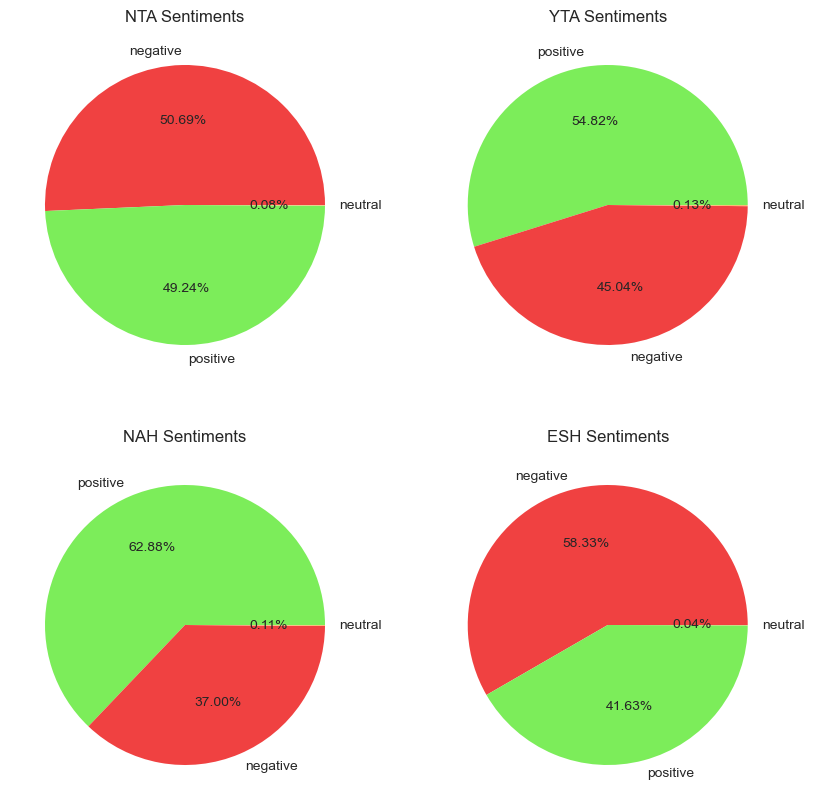

<Figure size 800x800 with 0 Axes>

In [112]:
figure, axis = plt.subplots(2, 2, figsize=(10,10)) 
plt.figure(figsize=(8,8))

axis[0, 0].pie(nta_df['Sentiment Label'].value_counts(), labels = ['negative', 'positive', 'neutral'], autopct='%1.2f%%', 
        textprops={'fontsize':10}, colors = ['#f04141', '#7ced5a', '#fabd73']) 
axis[0, 0].set_title('NTA Sentiments') 


axis[0, 1].pie(yta_df['Sentiment Label'].value_counts(), labels = ['positive', 'negative', 'neutral'], autopct='%1.2f%%', 
        textprops={'fontsize':10}, colors = ['#7ced5a', '#f04141', '#fabd73']) 
axis[0, 1].set_title('YTA Sentiments') 
  

axis[1, 0].pie(nah_df['Sentiment Label'].value_counts(), labels = ['positive', 'negative', 'neutral'], autopct='%1.2f%%', 
        textprops={'fontsize':10}, colors = ['#7ced5a', '#f04141', '#fabd73']) 
axis[1, 0].set_title('NAH Sentiments') 
  
    
axis[1, 1].pie(esh_df['Sentiment Label'].value_counts(), labels = ['negative', 'positive', 'neutral'], autopct='%1.2f%%', 
        textprops={'fontsize':10}, colors = ['#f04141', '#7ced5a', '#fabd73']) 
axis[1, 1].set_title('ESH Sentiments') 

#### Before making this analysis, in my head I associated negative sentiments with the original poster being the 'asshole'. I expected that posts with 'NTA' verdict to have more positive sentiments, and posts with 'YTA' verdict to have more negative sentiments. But it turned out the opposite. Machines and people disagreed here. For 'NAH' I thought that I'd get more positive sentiments and I did. Finally for 'ESH' I expected to get more negative sentiments and I did. 

### Let's do the analysis on the post titles now to see if the sentiments of the posts match with their title sentiment.

In [113]:
aita_title_sentiments = analyze_sentiment(aita_titles)

In [114]:
aita['title_sentiment'] = aita_title_sentiments

In [115]:
aita['title_sentiment_label'] = aita['title_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
aita[['title', 'title_sentiment', 'title_sentiment_label']]

title  title_sentiment  \
0               aita for wanting to celebrate my birthday           0.5719   
1                                          aita for being           0.0000   
2                aita for getting mad at an autistic kid?          -0.4939   
3              aita for playing a prank on my housemates?           0.2023   
4       aita for asking my boyfriend to not be in the ...           0.0000   
...                                                   ...              ...   
270704    aita for not asking family to restart business.           0.0000   
270705  aita for not buying my brother a game with my ...           0.0000   
270706  wibta if i take my mother to court over my col...           0.0000   
270707  aita for refusing to kiss my girlfriend after ...           0.5267   
270708       aita for visiting my parents with my newborn           0.0000   

       title_sentiment_label  
0                   positive  
1                    neutral  
2                   negative  
3                   positive  
4                    neutral  
...                      ...  
270704               neutral  
270705               neutral  
270706               neutral  
270707              positive  
270708               neutral  

[270709 rows x 3 columns]

In [116]:
aita_title_sentiment_counts = aita['title_sentiment_label'].value_counts()
aita_title_sentiment_counts

title_sentiment_label
neutral     110846
negative     93004
positive     66859
Name: count, dtype: int64

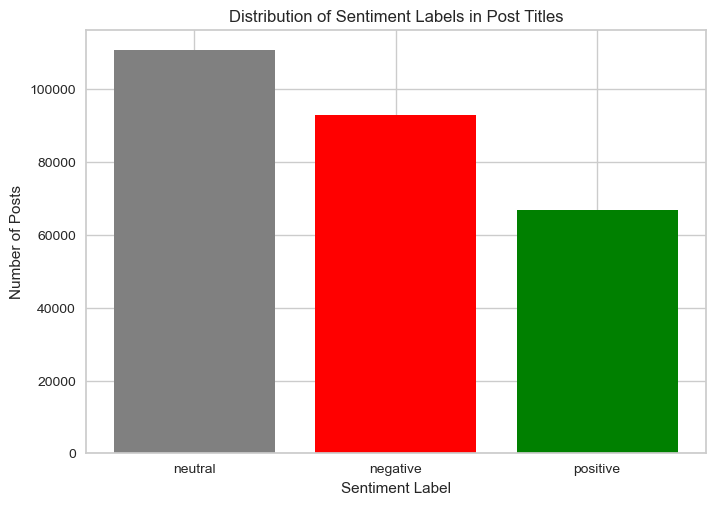

In [117]:
colors = ['grey', 'red', 'green']
plt.bar(aita_title_sentiment_counts.index, aita_title_sentiment_counts.values, color=colors)
plt.title('Distribution of Sentiment Labels in Post Titles')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.show()

#### Number of neutral titles are very high, followed by the negative titles.

I want to compare the title sentiments with the post sentiments.

In [118]:
aita_sentiment_label = aita['sentiment_label']
aita_title_sentiment_label = aita['title_sentiment_label']

In [119]:
aita_sentiment_df = pd.concat([aita_sentiment_label, aita_title_sentiment_label],axis=1)
aita_sentiment_df

sentiment_label title_sentiment_label
0             positive              positive
1             negative               neutral
2             negative              negative
3             positive              positive
4             negative               neutral
...                ...                   ...
270704        positive               neutral
270705        negative               neutral
270706        positive               neutral
270707        positive              positive
270708        negative               neutral

[270709 rows x 2 columns]

In [120]:
aita_sentiment_df.index

RangeIndex(start=0, stop=270709, step=1)

In [121]:
aita_sentiments_compare = []

for i in aita_sentiment_df.index:
    if aita_sentiment_df['sentiment_label'][i] == aita_sentiment_df['title_sentiment_label'][i]:
        aita_sentiments_compare.append(1)
    else:
        aita_sentiments_compare.append(0)

In [122]:
aita_sentiment_df['comparison'] = aita_sentiments_compare

In [123]:
aita_sentiment_df

sentiment_label title_sentiment_label  comparison
0             positive              positive           1
1             negative               neutral           0
2             negative              negative           1
3             positive              positive           1
4             negative               neutral           0
...                ...                   ...         ...
270704        positive               neutral           0
270705        negative               neutral           0
270706        positive               neutral           0
270707        positive              positive           1
270708        negative               neutral           0

[270709 rows x 3 columns]

In [124]:
aita_sentiment_df['comparison'].value_counts()

comparison
0    172652
1     98057
Name: count, dtype: int64

#### 172652 post sentiments don't match with their title sentiments while 98057 of them do. It looks like the titles of some posts does not summarize the content of the posts well.

In [125]:
aita_sentiment_metrics = aita.groupby('title_sentiment_label')['score'].mean()
aita_sentiment_metrics.to_frame()

score
title_sentiment_label            
negative               699.223324
neutral                580.433169
positive               527.059274

#### It seems like posts with negative sentiments got the most engagement.

## Cluster Analysis

I will be taking a small portion of my dataset to save memory.

In [126]:
shuffled_aita = shuffle(aita, random_state=42)

In [127]:
aita_subset = shuffled_aita.head(int(len(shuffled_aita) * 0.08))

In [128]:
aita_subset

id                                              title  \
211497  stry8s  aita for getting mad at my future mother in la...   
33958   cbyvav  wibta if i told my friend that her attire is i...   
114749  hstpcc  aita for walling off my backyard because i dis...   
19718   bgszeq              aita for talking too loudly at a bar?   
185587  pvxnj5  aita for losing my shit at my mother for being...   
...        ...                                                ...   
118869  i1v7k3  aita because i told my sister that just becaus...   
164836  mz42yq  aita for not making an effort to invite my fri...   
72581   emn97n  aita for not wanting to listen to my roommate ...   
155432  lbbp8j  aita for not wanting to babysit my cousins aut...   
53899   dgnqju                    aita for feeling uncomfortable?   

                                                     text verdict  \
211497  so i have had body issues and self esteem prob...     nta   
33958   my friend is turning 29 this year, and just go...     yta   
114749  i sure feel like ta but i don't think i am so ...     nta   
19718   hi all. i was just in the outdoor area at the ...     nah   
185587  f16, i’ve had an issue with my weight ever sin...     nta   
...                                                   ...     ...   
118869  so hear me out! my sister completed her high s...     nta   
164836  i \\] have three “best” friends in school ...     nta   
72581    i live in a five bedroom house with five othe...     esh   
155432  eta: thanks so much for all the support. i’ve ...     nta   
53899   so my best friend (16m) just came out as bisex...     nah   

                                                 comment1  \
211497  nta. you have a right to wear *whatever you li...   
33958   yta already for judging your friend so harshly...   
114749  nta. kids/their parents ruined it for everyone...   
19718   nah. my friends and i are very loud. we work i...   
185587  nta. don’t be her punching bag, but don’t go h...   
...                                                   ...   
118869  nta 1: you were correct. having a college educ...   
164836  nta - assuming jack doesn't have mobility issu...   
72581   esh. your roommates should not, under any circ...   
155432  i feel like it’s a terrible idea to give your ...   
53899   nah. just talk to him. tell him that you still...   

                                                 comment2  score  sentiment  \
211497  nta- if it wasn't said now it would be said la...    896     0.8978   
33958   yta.  >my parents noticed that she would wear ...     19     0.7912   
114749  nta. it's your property and you were very unde...  26808     0.9878   
19718   nah the debate got a bit heated. you were a bi...      7     0.8848   
185587  nta. i am sure your mom is going through a lot...     23    -0.9770   
...                                                   ...    ...        ...   
118869  nta: i worked at old navy in college one of my...     14    -0.9781   
164836  nta, i assume jack knows where you live also. ...     10    -0.2547   
72581   esh - i've lived with different roommates in d...      0    -0.9674   
155432  nta. you have no obligation to watch anyone's ...    676     0.9796   
53899   nah, but until you are clearer about your feel...     12     0.9840   

       sentiment_label  title_sentiment title_sentiment_label  
211497        positive          -0.4939              negative  
33958         positive           0.4939              positive  
114749        positive          -0.6808              negative  
19718         positive           0.0000               neutral  
185587        negative          -0.7351              negative  
...                ...              ...                   ...  
118869        negative           0.4404              positive  
164836        negative           0.5541              positive  
72581         negative           0.0000               neutral  
155432        positive           0.0

In [129]:
aita_subset_tfidf = TfidfVectorizer(stop_words='english')
aita_subset_vectorized = aita_subset_tfidf.fit_transform(aita_subset['title'])

In [130]:
aita_pca = PCA(n_components=2)
reduced_aita_subset = aita_pca.fit_transform(aita_subset_vectorized.toarray())
reduced_aita_subset.shape

(21656, 2)

### The Elbow Method
The Elbow Method helps us find the optimal number of clusters.

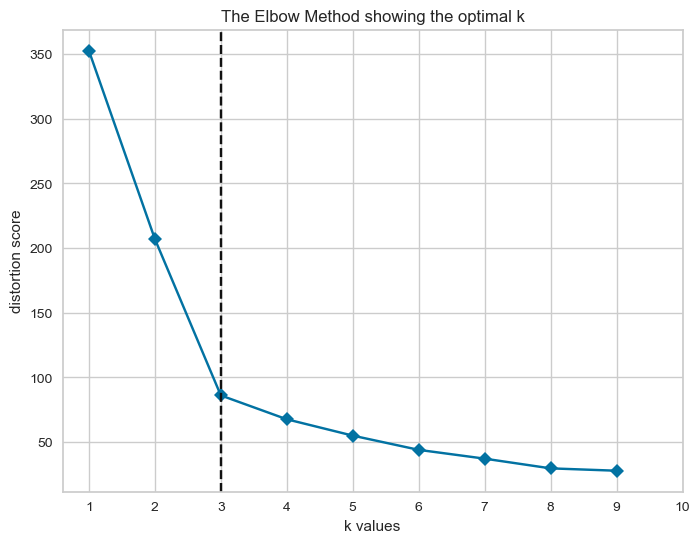

In [131]:
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax = plt.subplots()

cluster_model = KMeans(init='random', n_init=20, random_state=2002)

visualizer = KElbowVisualizer(cluster_model, k=(1,10), timings=False, ax=ax)
visualizer.fit(reduced_aita_subset)
visualizer.ax.set_ylabel('distortion score')
visualizer.ax.set_xlabel('k values')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
visualizer.ax.set_title('The Elbow Method showing the optimal k');   

#### The Elbow Method suggests that k=3 is the optimal k value. I am going to fit KMeans() model with `k=3`.

In [132]:
kmeans3 = KMeans(n_clusters=3, init='random', n_init=20, random_state=2002)
kmeans3.fit(reduced_aita_subset)

KMeans(init='random', n_clusters=3, n_init=20, random_state=2002)

The model is fit. Let's get the cluster labels with `predict` method.


In [133]:
aita_cluster_labels = kmeans3.predict(reduced_aita_subset)
aita_cluster_labels

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)

In [134]:
pd.Series(kmeans3.labels_).value_counts()

0    17336
1     2340
2     1980
Name: count, dtype: int64

Let's draw a bar graph to see the amount of posts per cluster.

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_24087/1621643425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aita_subset['cluster'] = aita_cluster_labels


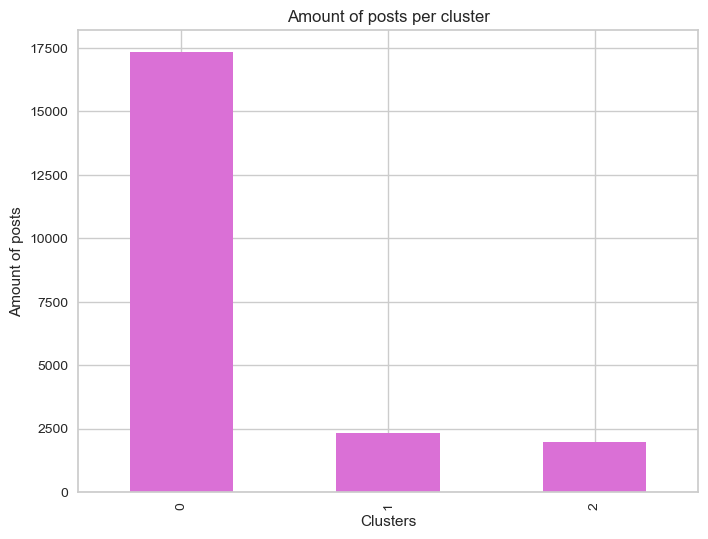

In [135]:
aita_subset['cluster'] = aita_cluster_labels
aita_subset['cluster'].value_counts().plot(kind='bar', color = 'orchid')
plt.xlabel('Clusters')
plt.ylabel('Amount of posts')
plt.title('Amount of posts per cluster')
plt.show()

#### Cluster 1 has the most posts.

In [136]:
aita_clustered = aita_subset[['title', 'cluster', 'score']]
aita_clustered

title  cluster  score
211497  aita for getting mad at my future mother in la...        0    896
33958   wibta if i told my friend that her attire is i...        1     19
114749  aita for walling off my backyard because i dis...        0  26808
19718               aita for talking too loudly at a bar?        0      7
185587  aita for losing my shit at my mother for being...        0     23
...                                                   ...      ...    ...
118869  aita because i told my sister that just becaus...        0     14
164836  aita for not making an effort to invite my fri...        1     10
72581   aita for not wanting to listen to my roommate ...        2      0
155432  aita for not wanting to babysit my cousins aut...        2    676
53899                     aita for feeling uncomfortable?        0     12

[21656 rows x 3 columns]

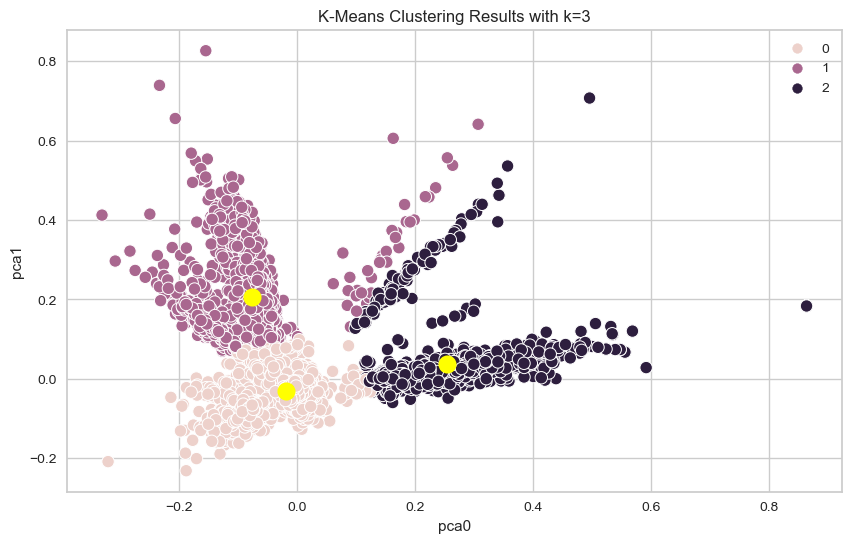

In [137]:
plt.rcParams['figure.figsize'] = [10, 6]

sns.scatterplot(data=reduced_aita_subset, x=reduced_aita_subset.pca0, y=reduced_aita_subset.pca1, hue=aita_cluster_labels, s=80)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], marker='o', s=100, c='yellow', linewidth=3)
plt.title('K-Means Clustering Results with k=3')
plt.show();

#### The clusters look good.

I am dividing the dataframe by clusters.

In [138]:
aita_cluster0 = aita_clustered[aita_clustered['cluster'] == 0]
aita_cluster1 = aita_clustered[aita_clustered['cluster'] == 1]
aita_cluster2 = aita_clustered[aita_clustered['cluster'] == 2]

I tokenized and filtered the clustered datasets with the functions I wrote earlier and then I made wordclouds for each cluster.

In [139]:
aita0 = filtered(tokenize(aita_cluster0['title']))

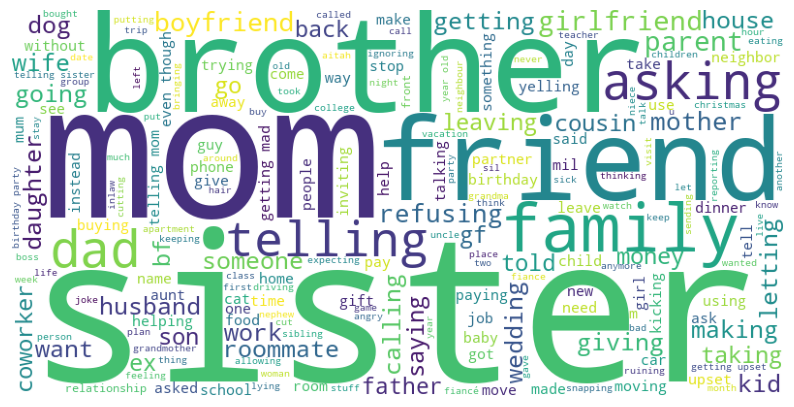

In [140]:
aita0_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(aita0))
plt.figure(figsize=(10, 8))
plt.imshow(aita0_wordcloud)
plt.axis('off')
plt.show()

In [141]:
aita1 = filtered(tokenize(aita_cluster1['title']))

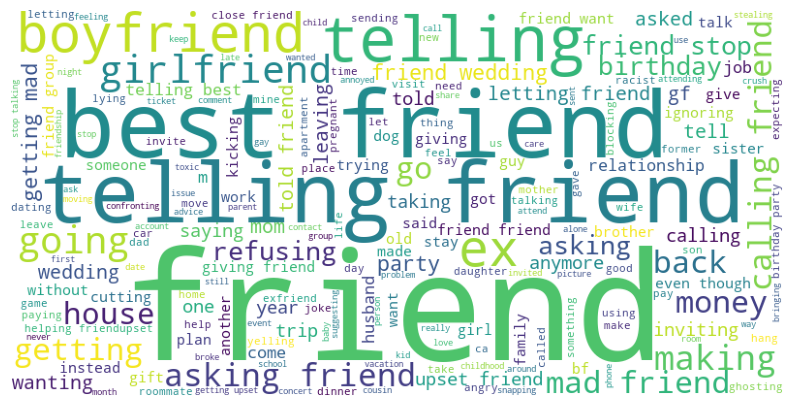

In [142]:
aita1_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(aita1))
plt.figure(figsize=(10, 8))
plt.imshow(aita1_wordcloud)
plt.axis('off')
plt.show()

In [143]:
aita2 = filtered(tokenize(aita_cluster2['title']))

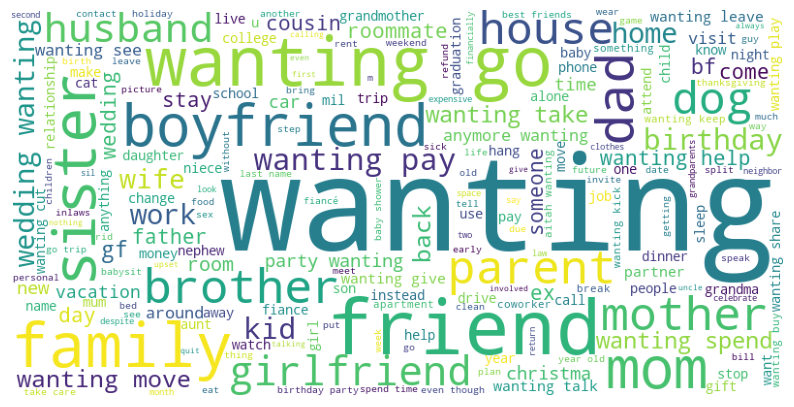

In [144]:
aita2_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(aita2))
plt.figure(figsize=(10, 8))
plt.imshow(aita2_wordcloud)
plt.axis('off')
plt.show()

In [145]:
Counter(aita0).most_common(10)

[('telling', 1809),
 ('sister', 1067),
 ('mom', 1041),
 ('asking', 797),
 ('refusing', 791),
 ('getting', 788),
 ('brother', 782),
 ('family', 740),
 ('friends', 670),
 ('dad', 643)]

In [146]:
Counter(aita1).most_common(10)

[('friend', 2319),
 ('telling', 401),
 ('best', 306),
 ('getting', 121),
 ('asking', 95),
 ('calling', 85),
 ('boyfriend', 84),
 ('wedding', 82),
 ('ex', 78),
 ('going', 74)]

In [147]:
Counter(aita2).most_common(10)

[('wanting', 1978),
 ('go', 173),
 ('family', 117),
 ('friend', 98),
 ('mom', 97),
 ('sister', 91),
 ('boyfriend', 90),
 ('friends', 90),
 ('wedding', 80),
 ('pay', 79)]

#### Most used words in clusters looks similar. I think this is due to r/AmITheAsshole's nature. People usually talk about their families, friends and love lives there.

### Average scores per cluster

In [148]:
aita_cluster0['score'].mean()

710.4605445316105

In [149]:
aita_cluster1['score'].mean()

299.82948717948716

In [150]:
aita_cluster2['score'].mean()

227.1

#### Let's visualize.

Text(0, 0.5, 'Scores')

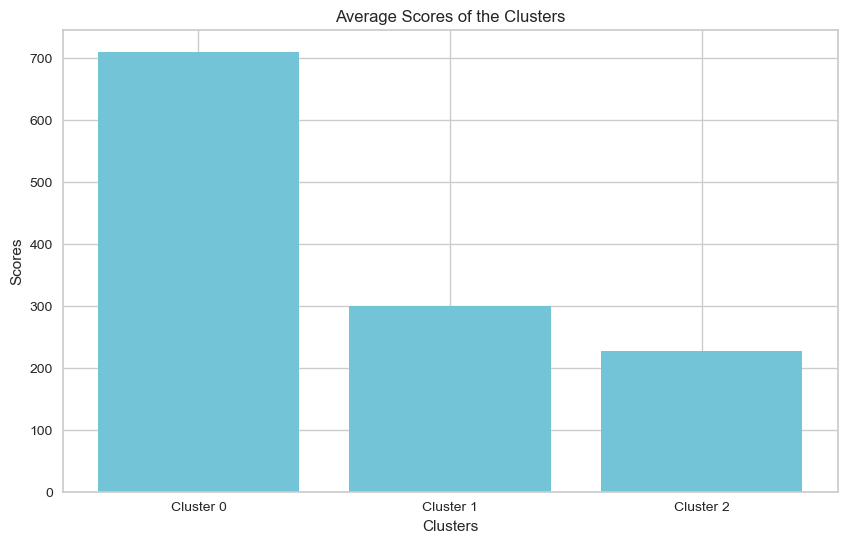

In [151]:
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2'], [aita_cluster0['score'].mean(), aita_cluster1['score'].mean(),
                                                 aita_cluster2['score'].mean()], color = '#72c4d6')
plt.title('Average Scores of the Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')

#### Posts in Cluster 1 got the most scores.

### I want to do the same analysis but with the text of the posts this time.

In [152]:
aita_subset2 = shuffled_aita.head(int(len(shuffled_aita) * 0.02))

In [153]:
aita_subset_text_vectorized = aita_subset_tfidf.fit_transform(aita_subset2['text'])

In [154]:
reduced_aita_subset_text = aita_pca.fit_transform(aita_subset_text_vectorized.toarray())
reduced_aita_subset_text.shape

(5414, 2)

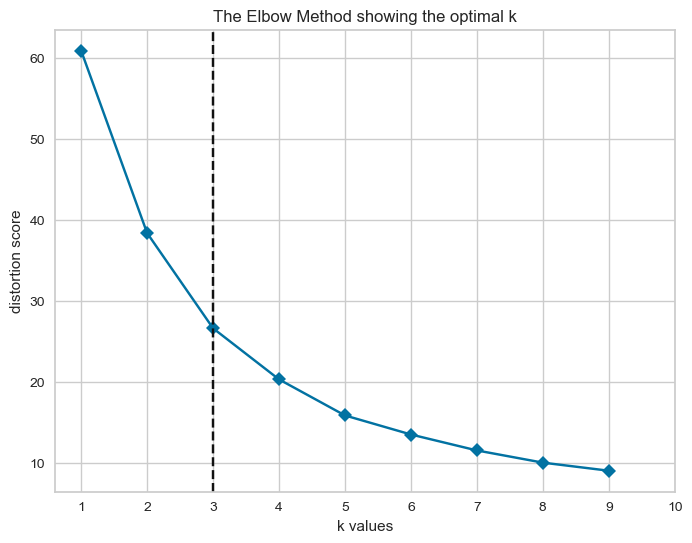

In [155]:
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax = plt.subplots()

cluster_model = KMeans(init='random', n_init=20, random_state=2002)

visualizer = KElbowVisualizer(cluster_model, k=(1,10), timings=False, ax=ax)
visualizer.fit(reduced_aita_subset_text)
visualizer.ax.set_ylabel('distortion score')
visualizer.ax.set_xlabel('k values')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
visualizer.ax.set_title('The Elbow Method showing the optimal k');   

#### Elbow method suggests that k = 3 is the optimal k here too.

In [156]:
kmeans3 = KMeans(n_clusters=3, init='random', n_init=20, random_state=2002)
kmeans3.fit(reduced_aita_subset_text)

KMeans(init='random', n_clusters=3, n_init=20, random_state=2002)

In [157]:
aita_cluster_labels_text = kmeans3.predict(reduced_aita_subset_text)

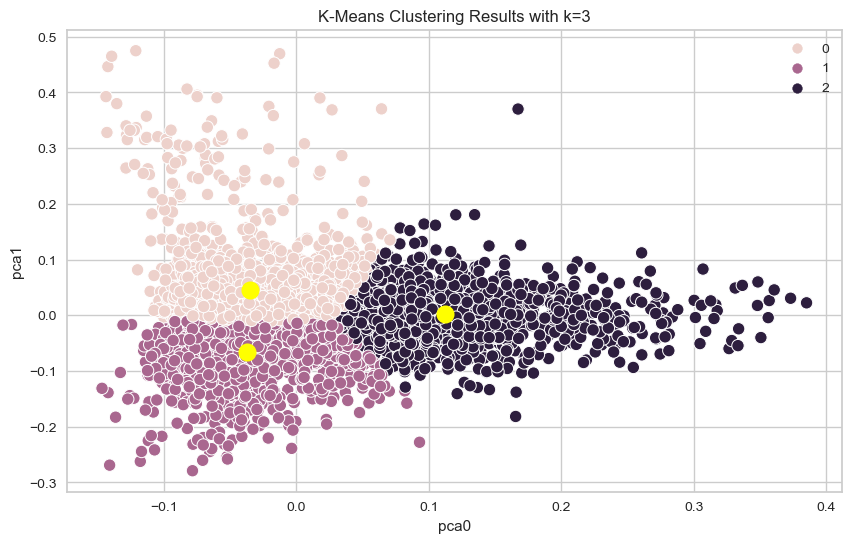

In [158]:
plt.rcParams['figure.figsize'] = [10, 6]

sns.scatterplot(data=reduced_aita_subset_text, x=reduced_aita_subset_text.pca0, 
                y=reduced_aita_subset_text.pca1, hue=aita_cluster_labels_text, s=80)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], marker='o', s=100, c='yellow', linewidth=3)
plt.title('K-Means Clustering Results with k=3')
plt.show();

In [159]:
aita_subset2['cluster'] = aita_cluster_labels_text

/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_24087/2800273399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aita_subset2['cluster'] = aita_cluster_labels_text


In [160]:
aita_clustered_text = aita_subset2[['text', 'cluster', 'score']]
aita_clustered_text

text  cluster  score
211497  so i have had body issues and self esteem prob...        1    896
33958   my friend is turning 29 this year, and just go...        1     19
114749  i sure feel like ta but i don't think i am so ...        0  26808
19718   hi all. i was just in the outdoor area at the ...        1      7
185587  f16, i’ve had an issue with my weight ever sin...        0     23
...                                                   ...      ...    ...
73373   hate is a strong word, so i want to preface th...        2      7
267956  hello, i (m in hs) had a verbal altercation wi...        1      1
112595  my partner and i frequent our local dog park b...        0      4
47552   about 6 month ago i got a hemorrhoid for the f...        1    102
156906  okay so hear me out.  i stopped seeing this gu...        1     85

[5414 rows x 3 columns]

In [161]:
aita_cluster_text0 = aita_clustered_text[aita_clustered_text['cluster'] == 0]
aita_cluster_text1 = aita_clustered_text[aita_clustered_text['cluster'] == 1]
aita_cluster_text2 = aita_clustered_text[aita_clustered_text['cluster'] == 2]

Let's tokenize and filter the text data too.

In [162]:
aita_text0 = filtered(tokenize(aita_cluster_text0['text']))
aita_text1 = filtered(tokenize(aita_cluster_text1['text']))
aita_text2 = filtered(tokenize(aita_cluster_text2['text']))

Now we can look at the most common words.

In [163]:
Counter(aita_text0).most_common(10)

[('would', 2747),
 ('get', 2626),
 ('like', 2446),
 ('said', 2358),
 ('told', 2235),
 ('m', 2116),
 ('time', 2100),
 ('one', 2074),
 ('work', 1722),
 ('got', 1711)]

#### Looks like this one's about work.

In [164]:
Counter(aita_text1).most_common(10)

[('like', 2959),
 ('said', 2789),
 ('friend', 2425),
 ('told', 2343),
 ('would', 2188),
 ('friends', 2154),
 ('time', 2037),
 ('really', 1968),
 ('m', 1770),
 ('know', 1743)]

#### This one is about friends.

In [165]:
Counter(aita_text2).most_common(10)

[('mom', 3087),
 ('told', 2118),
 ('said', 2053),
 ('like', 2032),
 ('would', 2014),
 ('family', 1894),
 ('dad', 1884),
 ('sister', 1792),
 ('get', 1653),
 ('time', 1588)]

#### And this one is about family.

Text(0, 0.5, 'Scores')

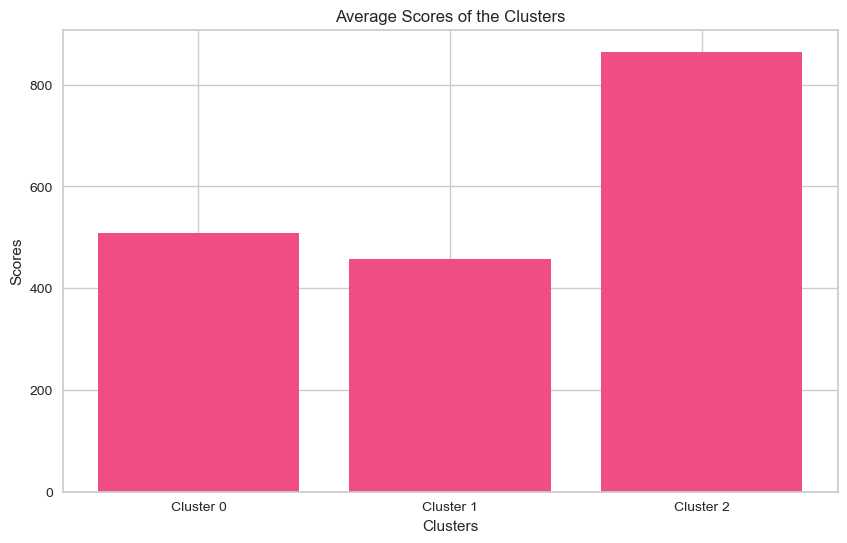

In [166]:
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2'], [aita_cluster_text0['score'].mean(), aita_cluster_text1['score'].mean(),
                                                 aita_cluster_text2['score'].mean()], color = '#f04d86')
plt.title('Average Scores of the Clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')

#### Posts in Cluster 2 got the most scores. According to my interpretation of the clusters I think Cluster 2 is about family. From here I can understand that people like to read about family issues.

## Comparison of the sub-reddits
------------------------------------------------------------------------------------------------------------------------------
- Most commonly used words were different in each sub-reddit because of the contextual differences between the sub-reddits.
- Due to difference in the structures of data sets some operations couldn't be applied to both.
- In both of our analyses, posts with negative sentiments got the highest engagement.
- In both of our analyses, the score of the posts decreased as the length of the posts increased.
- In the sentiment analysis for both data sets, the distribution between sentiment labels were similar with negative sentiments having the most occurance and positive sentiments having the least.


## Conclusion
-----------------------------------------------------------------------------------------------------------------------------
- We analyzed the subreddits and mainly found the most common words, phrases and their relationship with engagement metrics.
- We used nltk library to tokenize our text data.
- We used KMeans Clustering Algorithm to cluster our datasets into categories.
- We made different plots for visualization.
- We used TfidfVectorizer to vectorize our text data.
- We tried doing predictions through various machine learning algorithms but the outcomes were not very good and our project is about natural language processing so we came to the understanding that it was not a suitable task.
- r/AmITheAsshole data set didn't have features like 'tldr', 'created_utc' and 'num_comments'. We wrote the project proposal only considering the r/tifu data set so analysis on r/AmITheAsshole part was shorter than the r/tifu one.
- The datasets were considerably large, and we encountered challenges with certain methods due to their computational intensity.
- Finally, through our analyses we got some insights about people's social lives and their online engagements.

Beyza's CPU: Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz 2.70 GHz

Beyza's memory: 8,00 GB RAM

Beyza's storage: 117,3 GB of free space

Data acquisition was easy.
I was able to perform everything I wanted to on my data set but I faced
a memory issue while doing PCA. I wanted to do the principal component
analysis to reduce dimensions before going into K-Means. 
My computing resources weren't sufficient and I got this error:
MemoryError: Unable to allocate 271. GiB for an array with shape (270709, 134583) and data type float64
Overall, I didn't encounter any issues but some functions related to sentiment analysis took a very long time to run.
I can say that I've waited 20-30 minutes just to execute a single function.


Sena’s memory: 16 GB

Chip: Apple M1 Pro

214 GB available space

I was able to perform almost everything I wanted to except the sentiment analysis and K-means clustering on the posts’ entire text. I was not able to run the operations on the posts’ body text because it gave a time-out error and the kernel I was running died every time I tried. Therefore I had to make do with only the title’s sentiment analysis and clustering. Other than the operations I mentioned on posts’ body text  I was able to run everything I wanted to. But I had to wait for maybe 8-10 minutes for the K-means clustering on titles, which took a while to run but it was able to give an output. I also tried some other clustering methods like hierarchical clustering and I was going to create dendrograms but I was not able to run that as I encountered the time-out error so only K-means clustering worked for me. 

## References

#### Datasets:
- r/tifu: https://huggingface.co/datasets/reddit_tifu
- r/AmITheAsshole: https://huggingface.co/datasets/OsamaBsher/AITA-Reddit-Dataset
----------------------------------------------------------------------------------------------------------------
- https://stackoverflow.com/questions/20950650/how-to-sort-counter-by-value-python
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- https://bobbyhadz.com/blog/python-remove-punctuation-from-list
- https://blog.enterprisedna.co/how-to-remove-an-item-from-a-list-in-python/#:~:text=To%20remove%20an%20item%20from%20a%20list%20in%20Python%2C%20you,to%20empty%20the%20entire%20list
- https://www.investopedia.com/terms/c/correlationcoefficient.asp
- https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
- https://www.simplilearn.com/tutorials/statistics-tutorial/pearson-correlation-coefficient-in-statistics
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
- https://numpy.org/doc/stable/reference/generated/numpy.arange.html
- https://proclusacademy.com/blog/customize_matplotlib_piechart/
- https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
- https://www.scikit-yb.org/en/latest/api/cluster/elbow.html